Installing Ultralytics Package

In [ ]:
!pip install ultralytics

Checking if the package is installed properly

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


Importing YOLO

In [ ]:
from ultralytics import YOLO
from IPython.display import Image

Downloading Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yGjNOQYDYbnOqpzTKa2R")
project = rf.workspace("tamannas-workspace").project("counting-honeybees-all-dataset")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to counting-honeybees-all-dataset-1 in yolov8:: 100%|██████████| 16478/16478 [00:04<00:00, 3772.24it/s]


Setting Dataset Path

In [ ]:
dataset_path = "/content/counting-honeybees-all-dataset-1"

Training the YOLO model (yolov8)

Base Model: yolov8s.pt

Number of Epochs: 300


In [ ]:
!yolo task=detect mode=train data='/content/counting-honeybees-all-dataset-1/data.yaml' model="yolov8s.pt" epochs=100 imgsz=640

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/counting-honeybees-all-dataset-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

Checking for accuracy

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Validate the model on the validation dataset
results = model.val(data="/content/counting-honeybees-all-dataset-1/data.yaml", conf=0.25)

# Extract metrics
# Access precision values using the 'p' attribute directly on 'results.box'
precision = results.box.p.mean()  # Average precision across classes
recall = results.box.r.mean()        # Average recall across classes
map50 = results.box.map50                 # mAP@0.5
map50_95 = results.box.map                # mAP@0.5:0.95


# Print metrics in percentage format
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"mAP@0.5: {map50 * 100:.2f}%")
print(f"mAP@0.5:0.95: {map50_95 * 100:.2f}%")

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/counting-honeybees-all-dataset-1/valid/labels.cache... 1482 images, 14 backgrounds, 0 corrupt: 100%|██████████| 1482/1482 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 562, len(boxes) = 20990. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:24<00:00,  3.82it/s]


                   all       1482      20990      0.918      0.874      0.908      0.675
Speed: 0.6ms preprocess, 8.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
Precision: 91.77%
Recall: 87.45%
mAP@0.5: 90.82%
mAP@0.5:0.95: 67.52%


Zipping all the files from the folder "runs" to download and save the model and other important informations

In [ ]:
!zip -r runs-counting-honeybees-all-dataset.zip runs

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/val/ (stored 0%)
  adding: runs/detect/val/F1_curve.png (deflated 21%)
  adding: runs/detect/val/val_batch2_pred.jpg (deflated 7%)
  adding: runs/detect/val/val_batch1_pred.jpg (deflated 7%)
  adding: runs/detect/val/confusion_matrix_normalized.png (deflated 36%)
  adding: runs/detect/val/PR_curve.png (deflated 21%)
  adding: runs/detect/val/val_batch0_labels.jpg (deflated 6%)
  adding: runs/detect/val/P_curve.png (deflated 26%)
  adding: runs/detect/val/val_batch1_labels.jpg (deflated 7%)
  adding: runs/detect/val/val_batch0_pred.jpg (deflated 6%)
  adding: runs/detect/val/val_batch2_labels.jpg (deflated 7%)
  adding: runs/detect/val/R_curve.png (deflated 19%)
  adding: runs/detect/val/confusion_matrix.png (deflated 34%)
  adding: runs/detect/train2/ (stored 0%)
  adding: runs/detect/train2/labels_correlogram.jpg (deflated 29%)
  adding: runs/detect/train2/F1_curve.png (deflated 18%)
  adding: runs/de

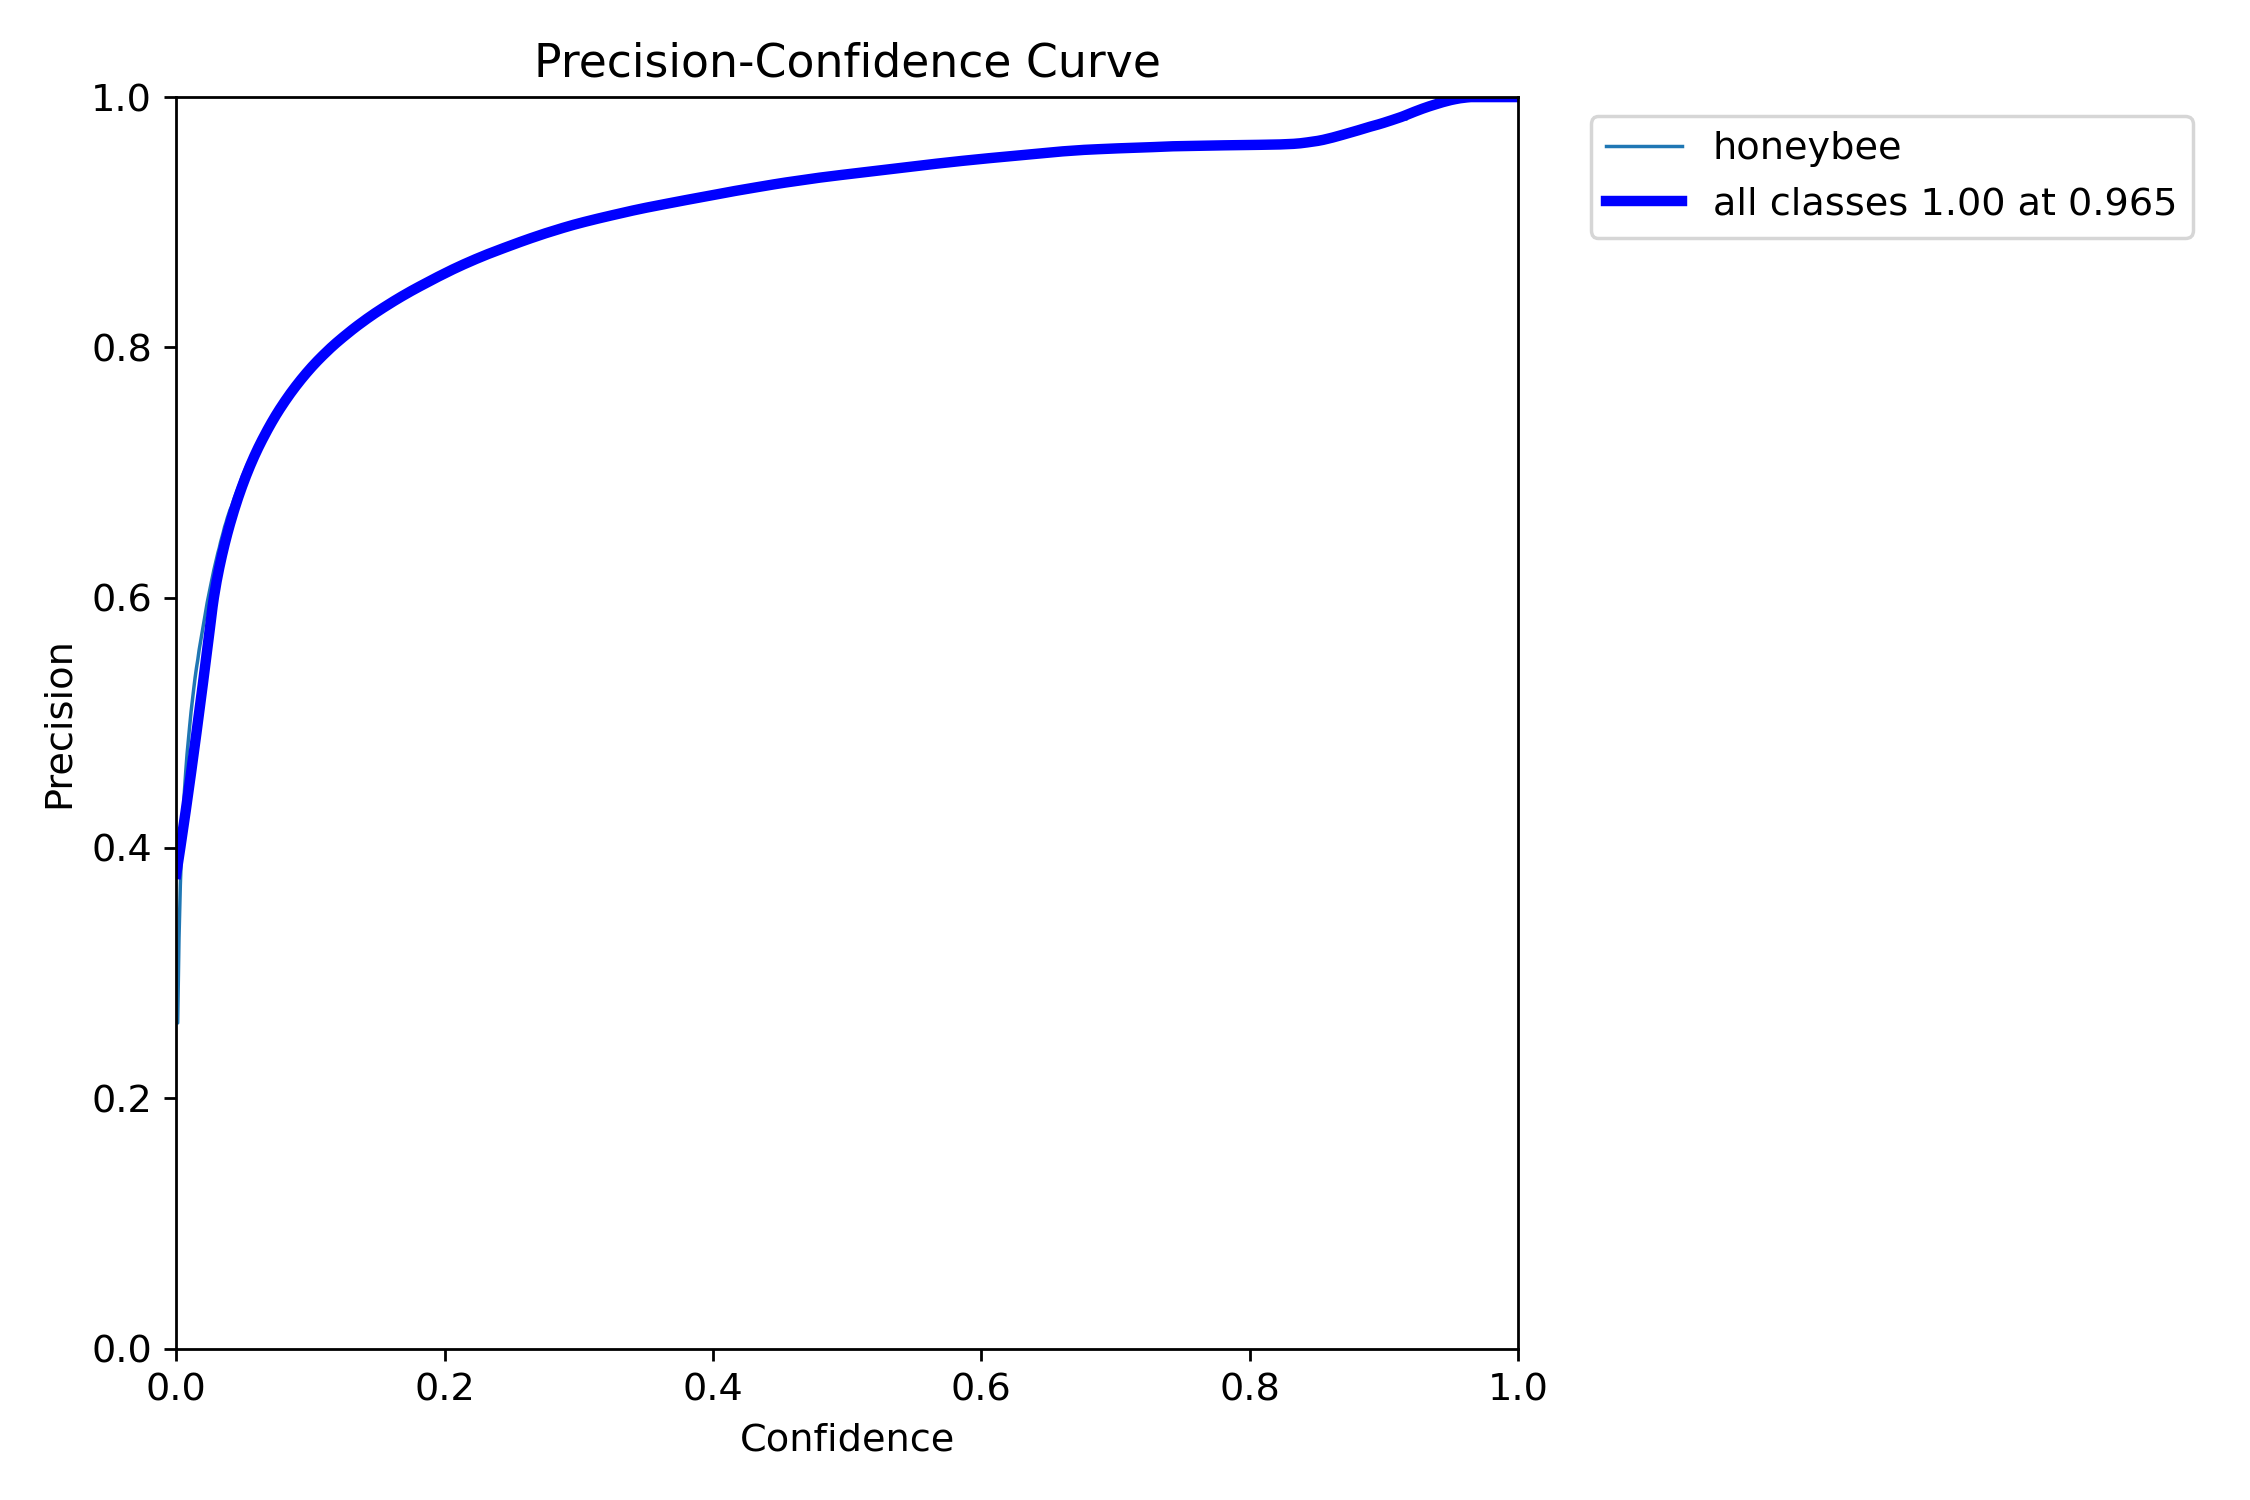

In [ ]:
Image("/content/runs/detect/train2/P_curve.png", width=600)

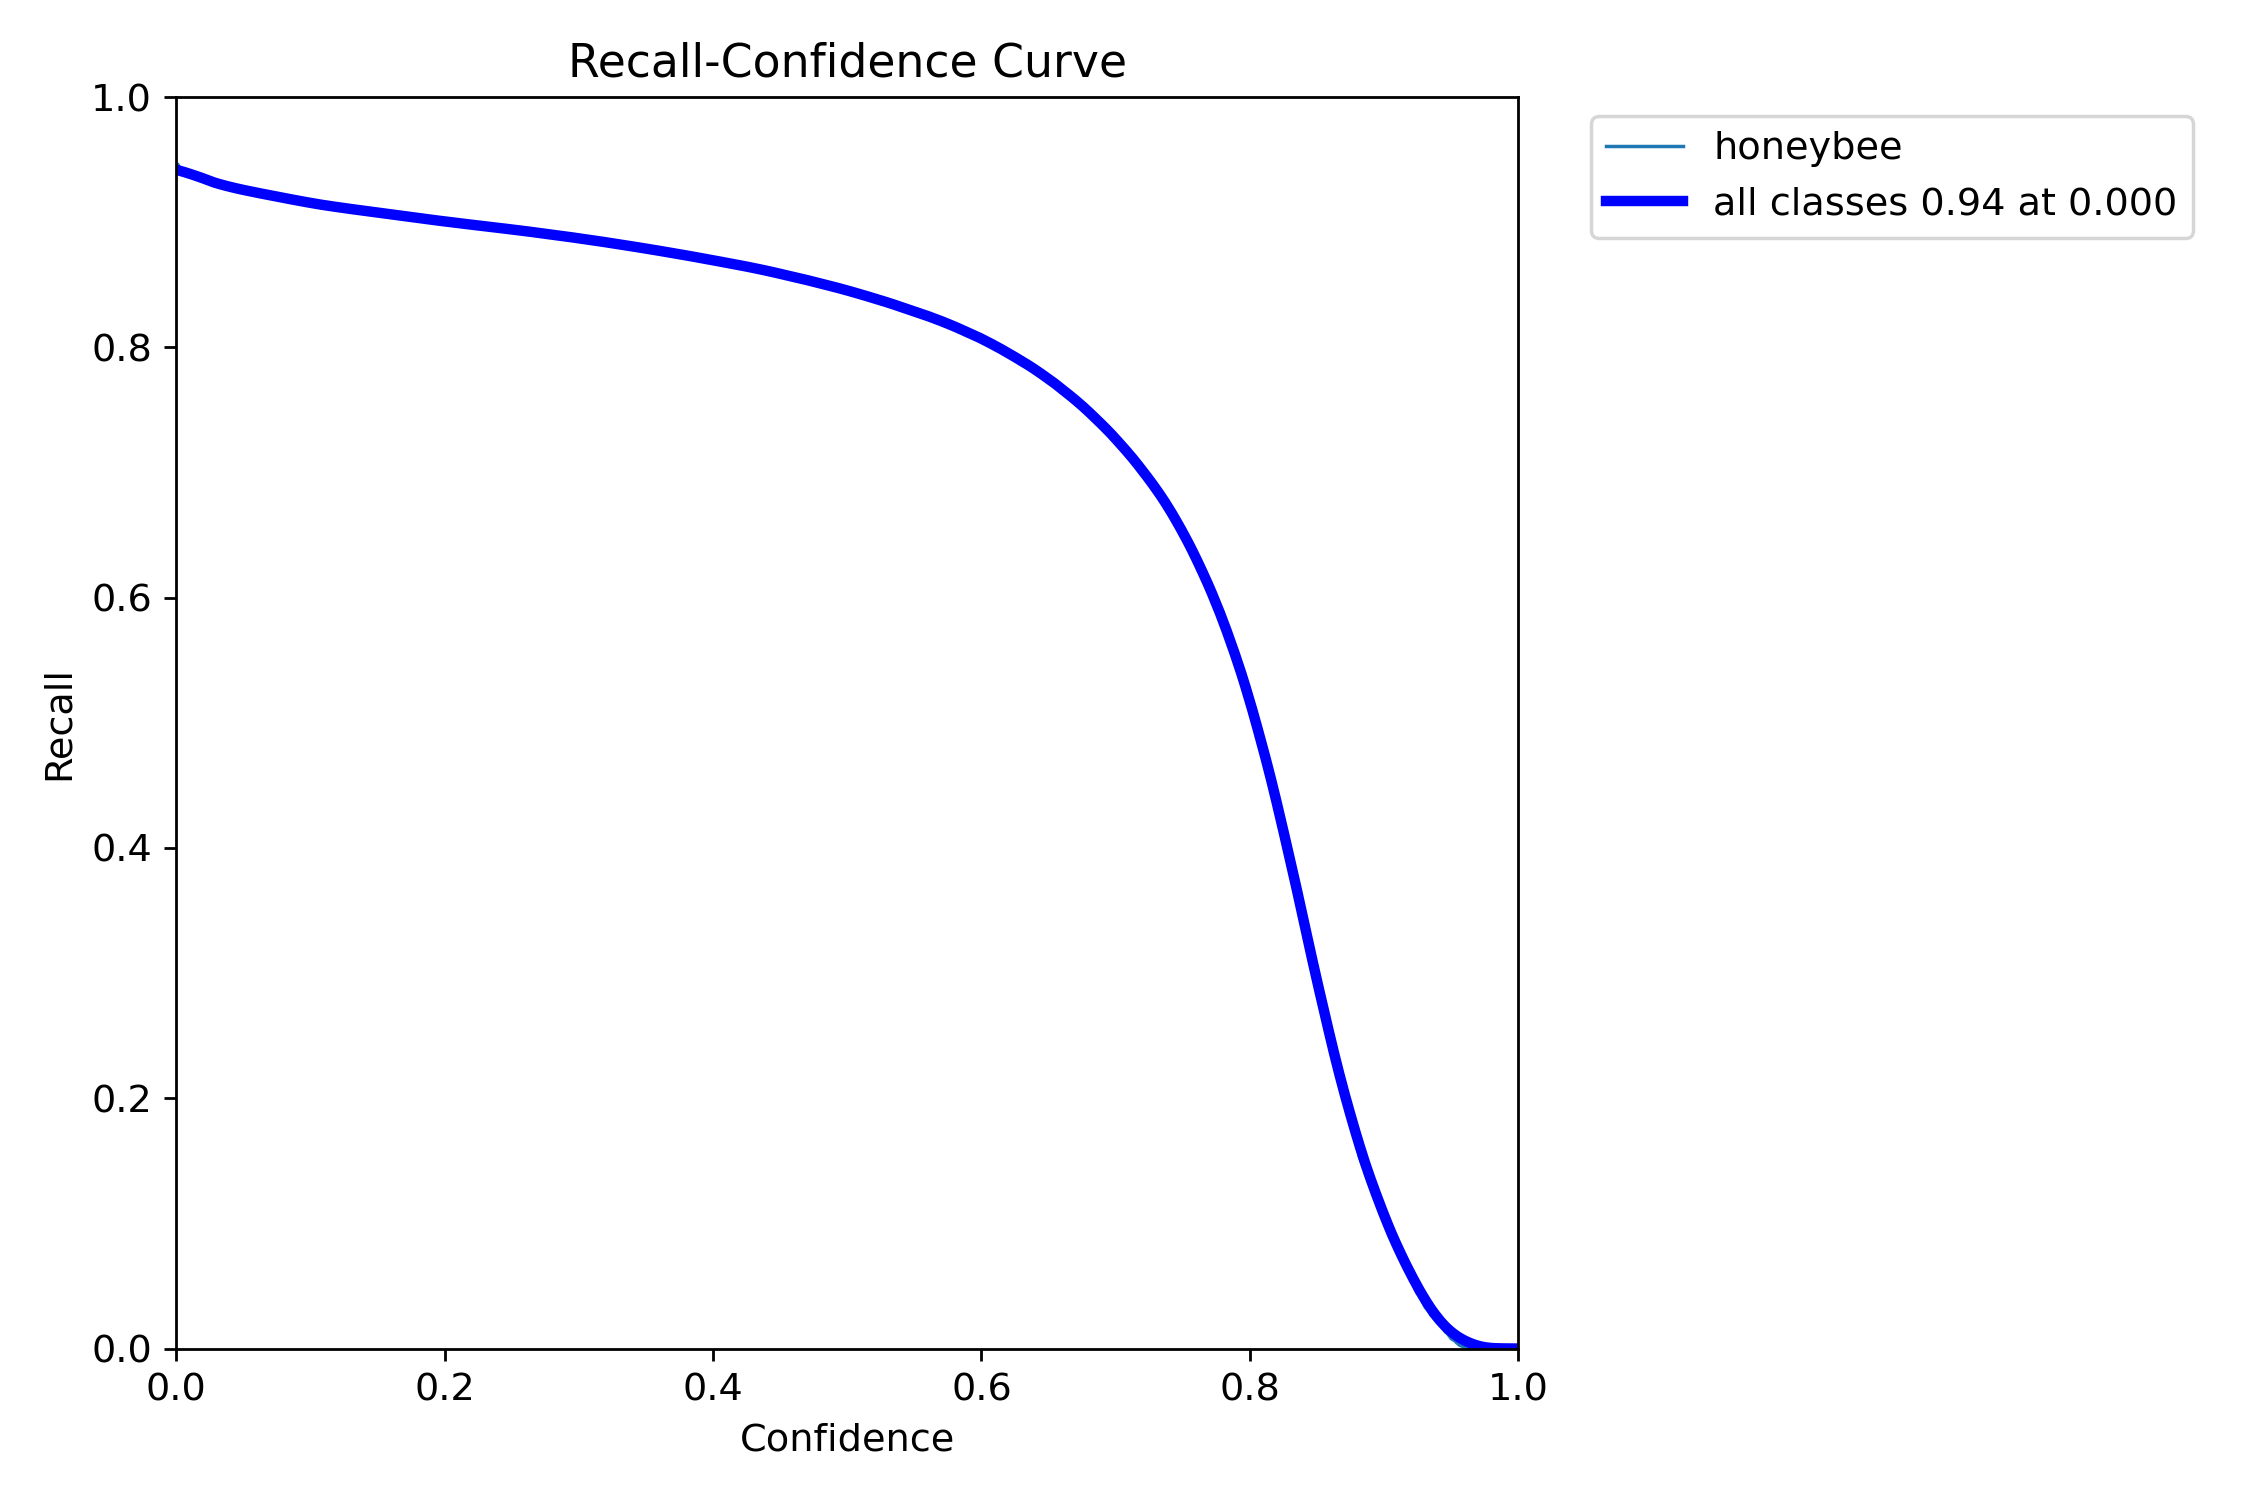

In [ ]:
Image("/content/runs/detect/train2/R_curve.png", width=600)

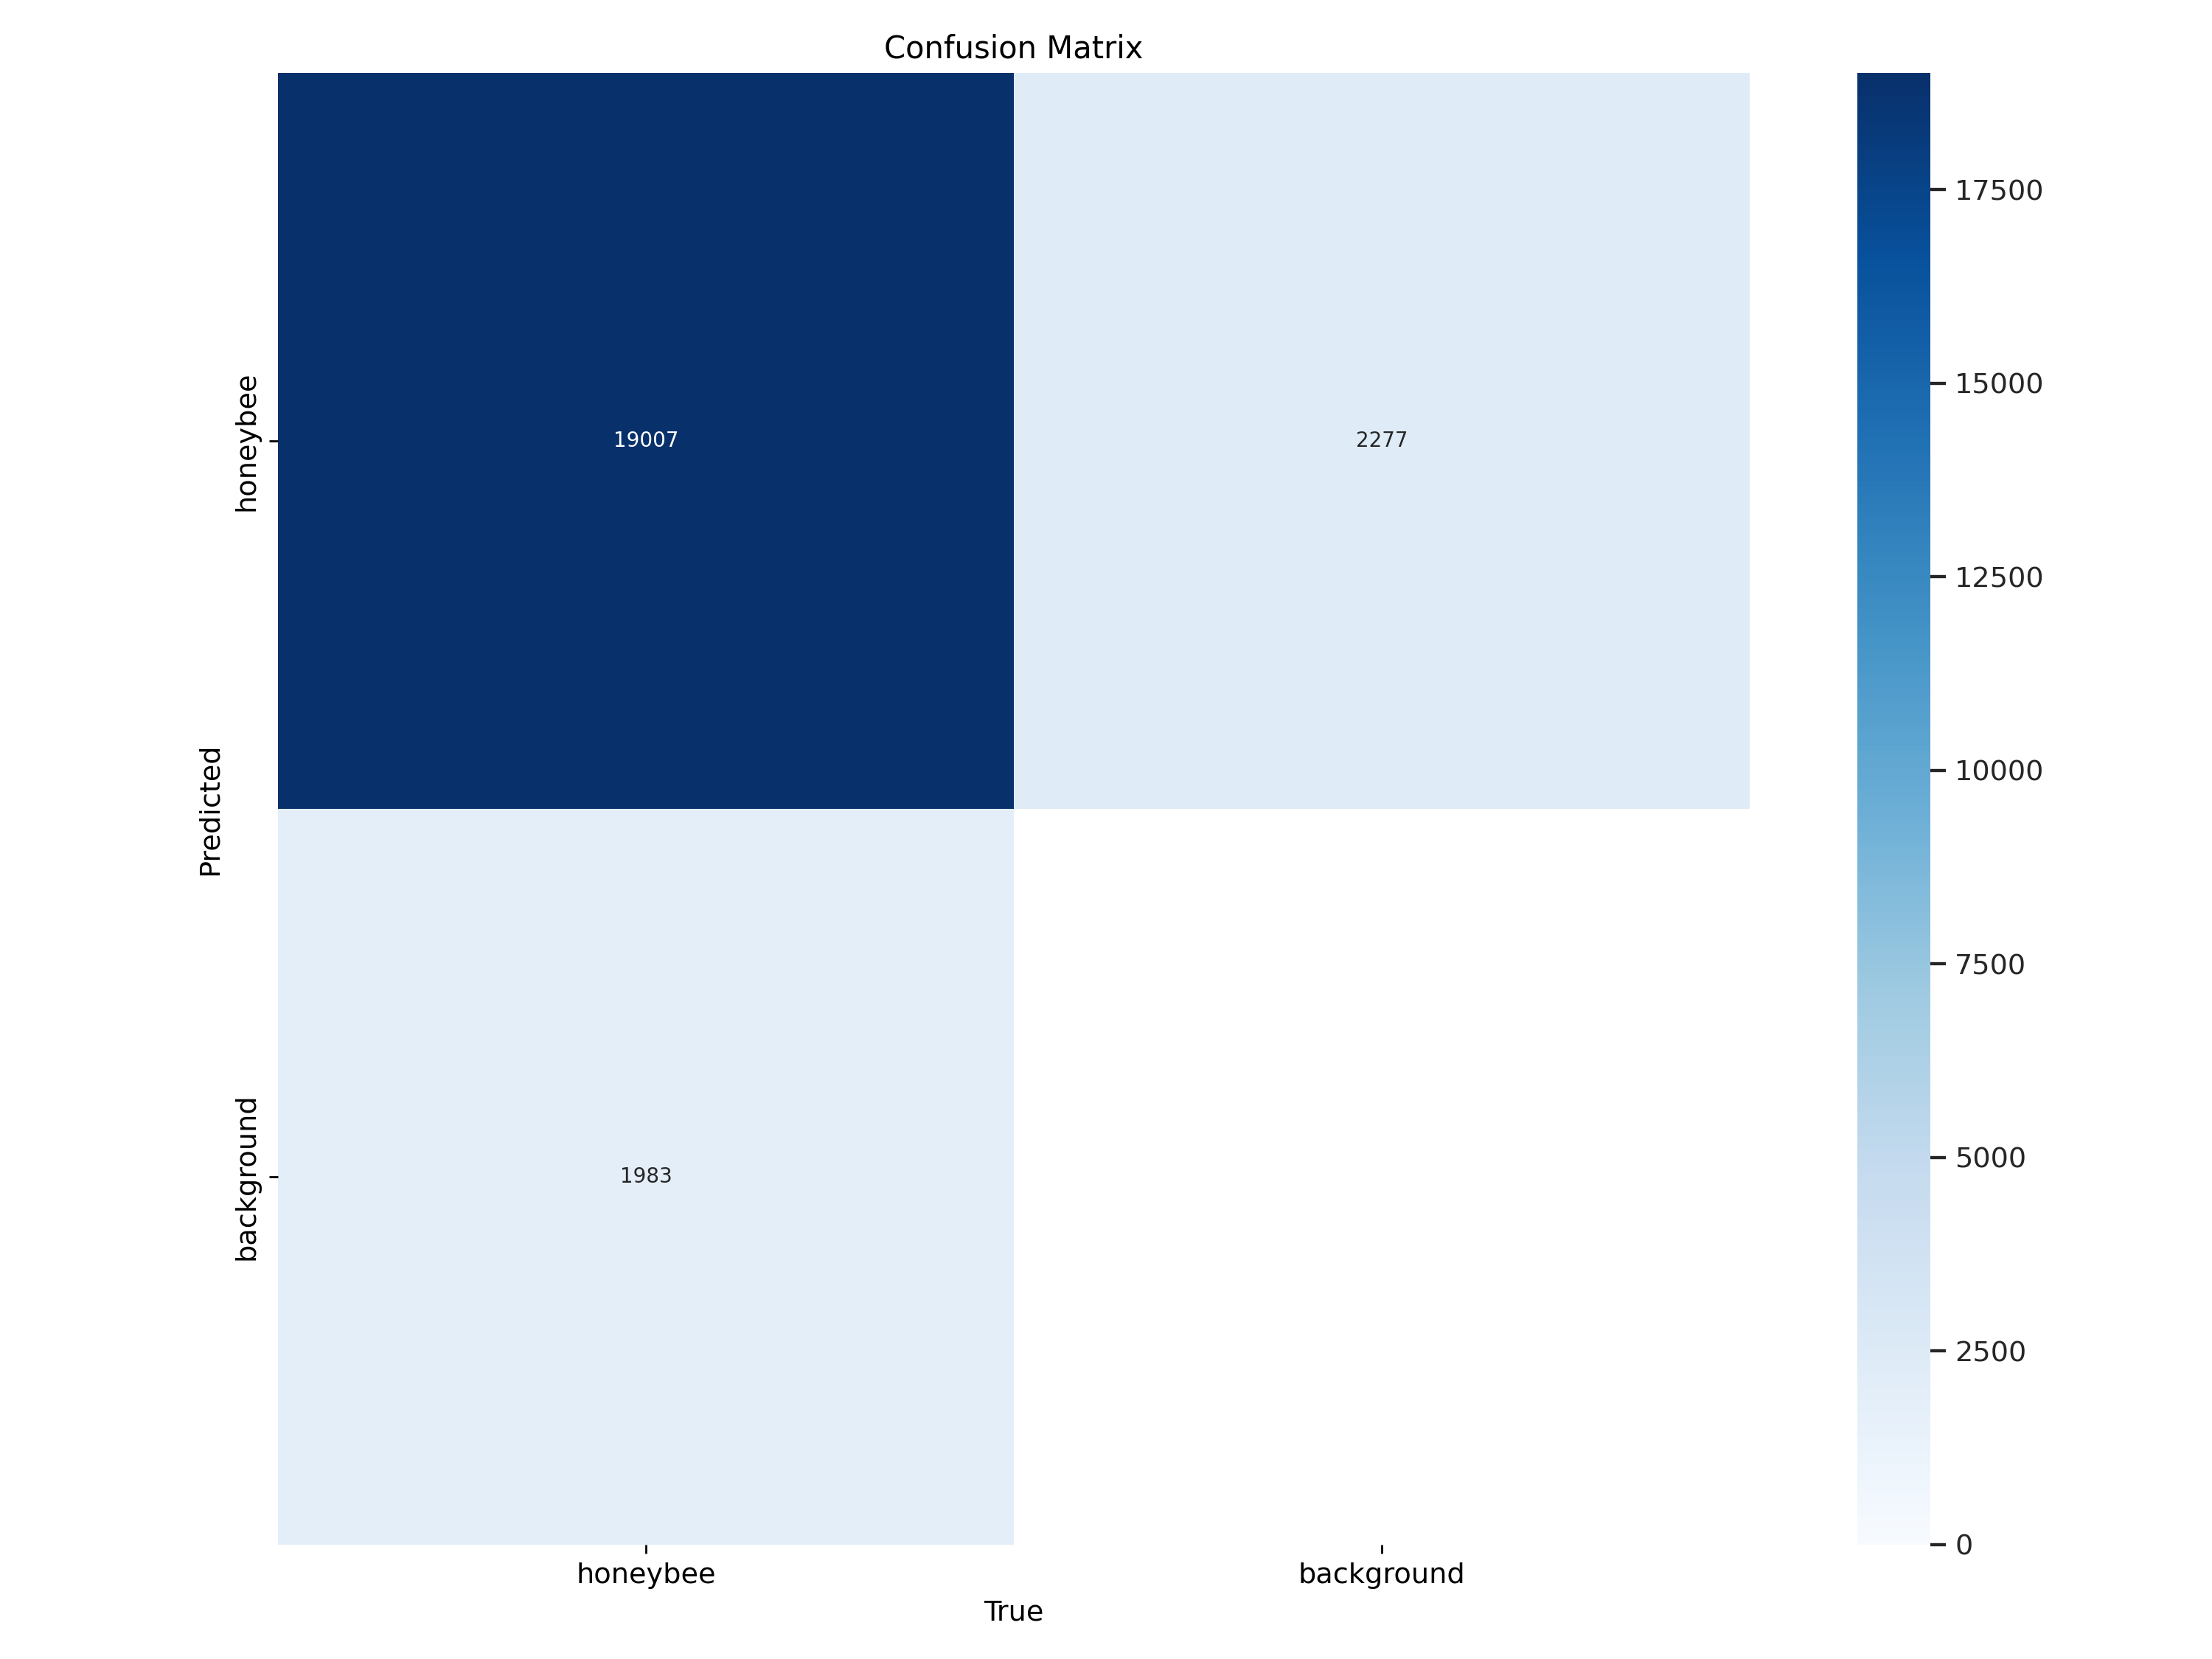

In [ ]:
Image("/content/runs/detect/train2/confusion_matrix.png", width=600)

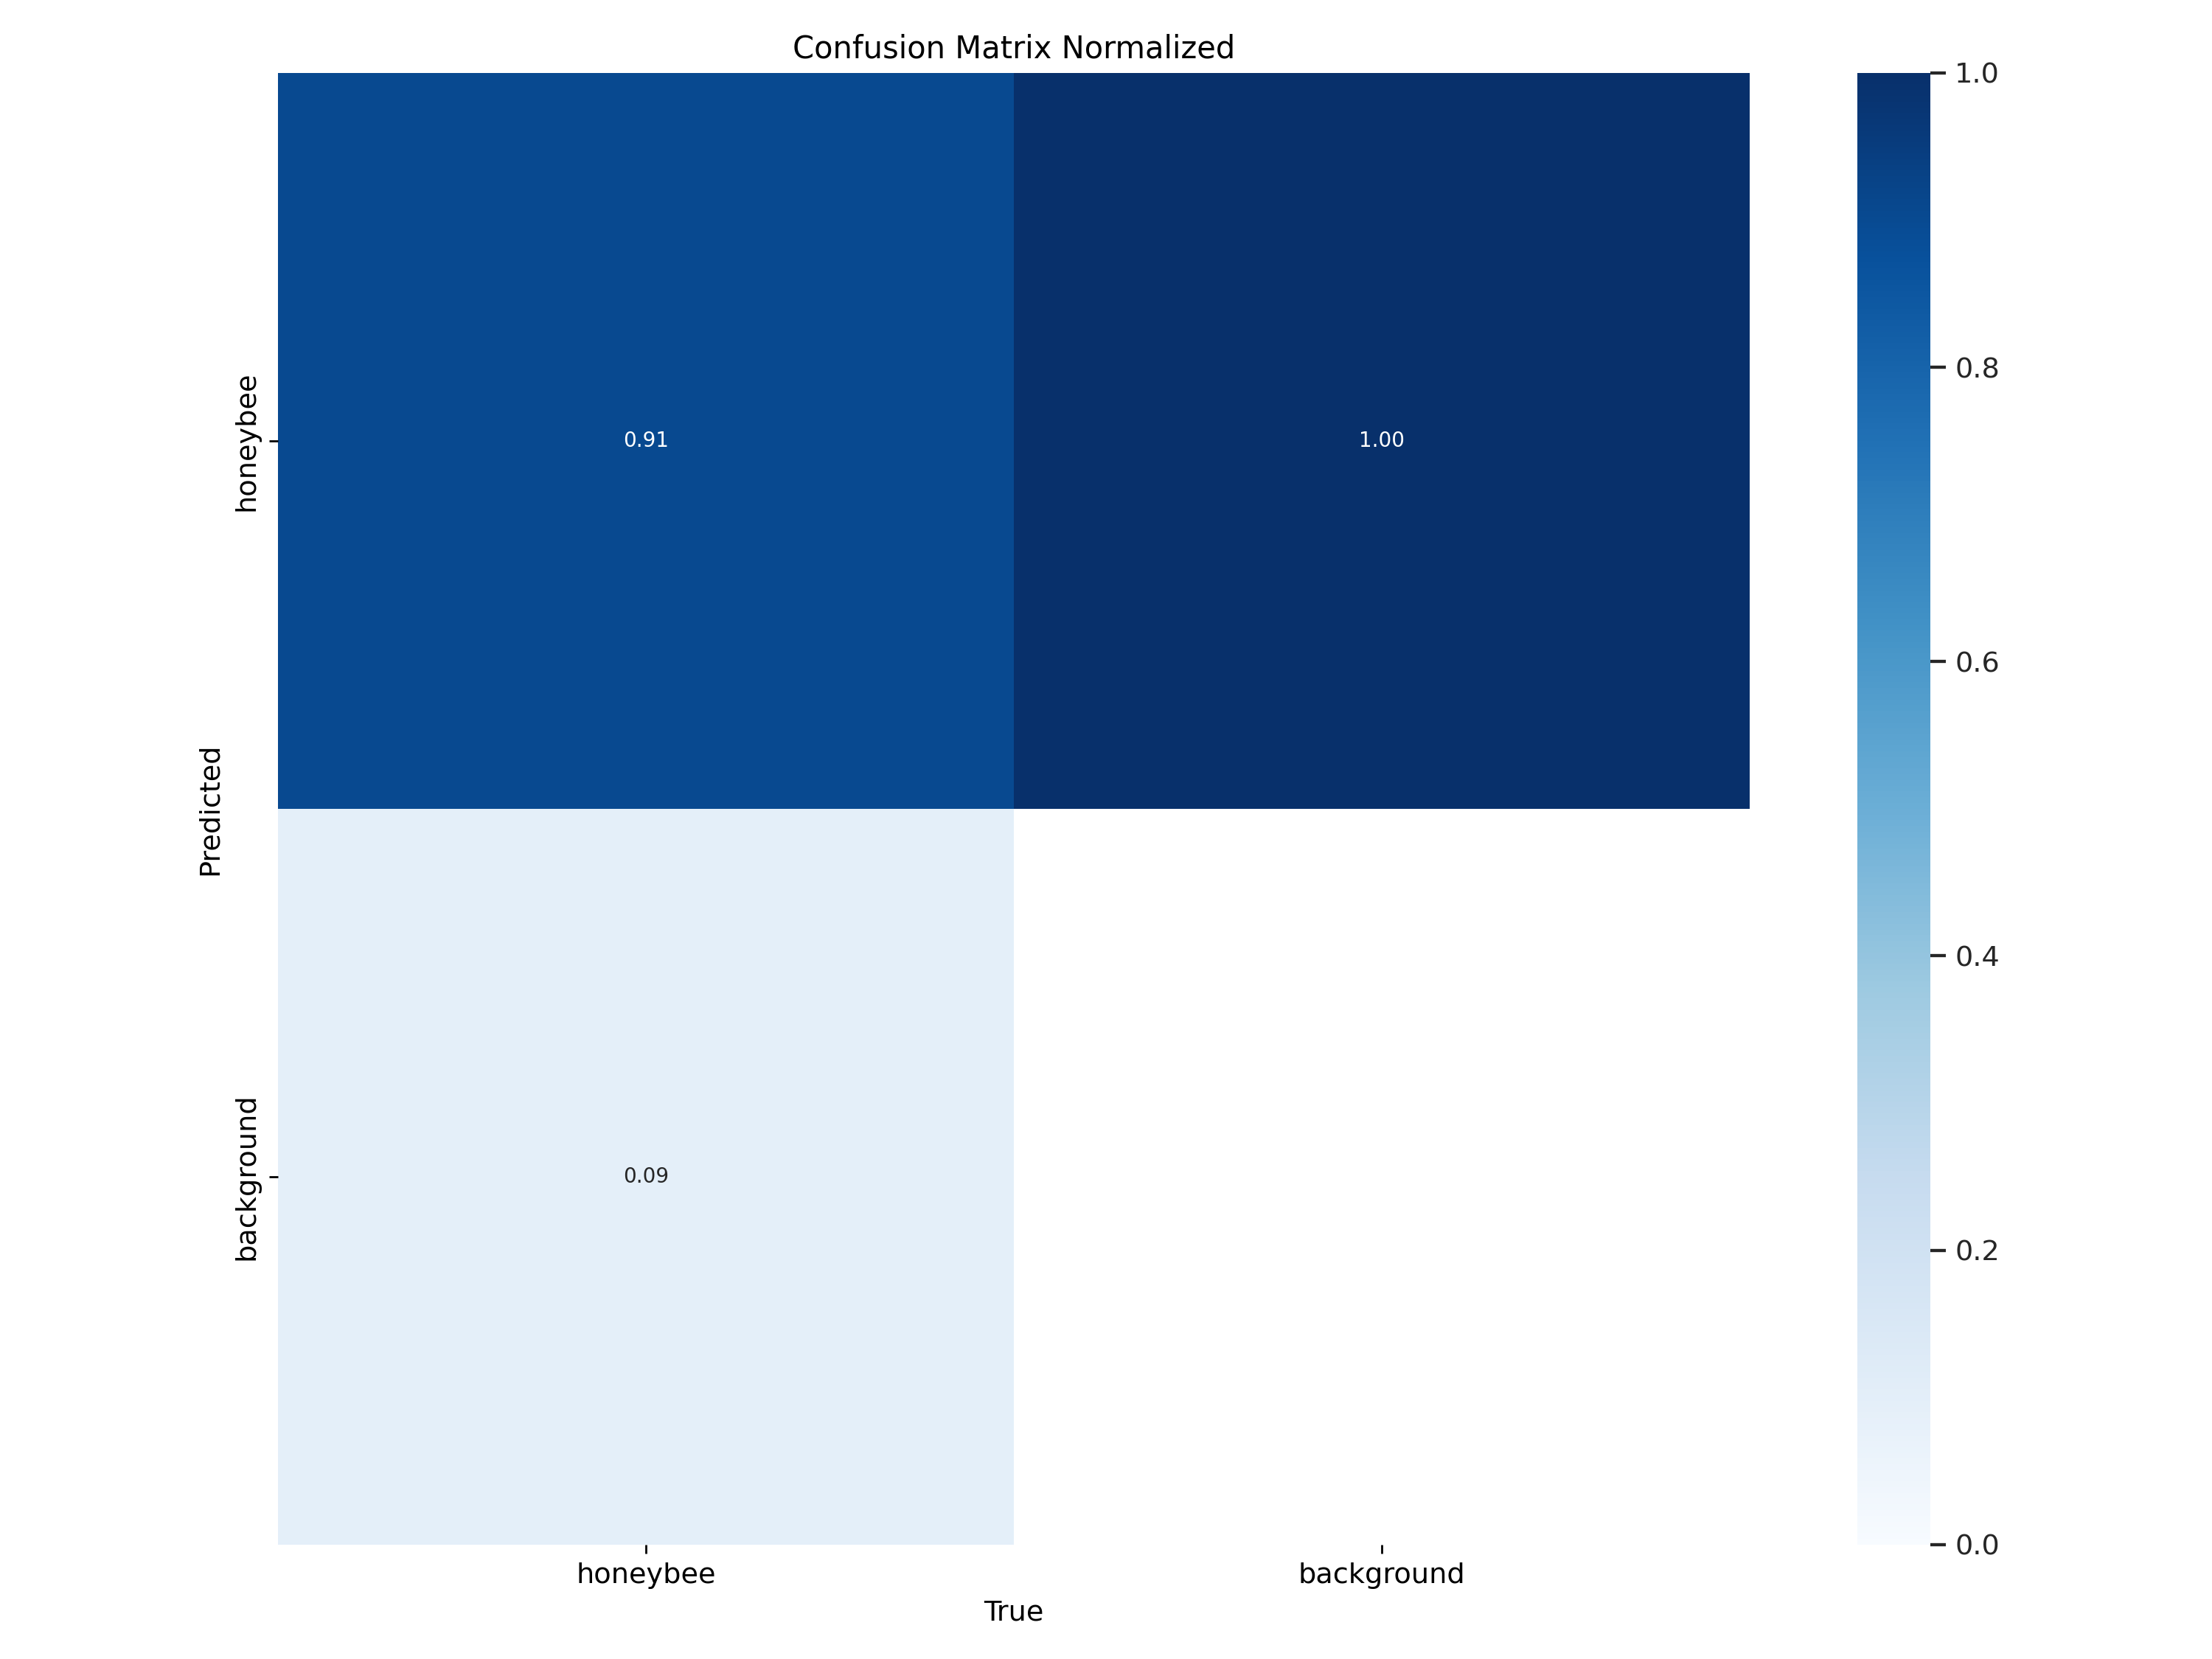

In [ ]:
Image("/content/runs/detect/train2/confusion_matrix_normalized.png", width=600)

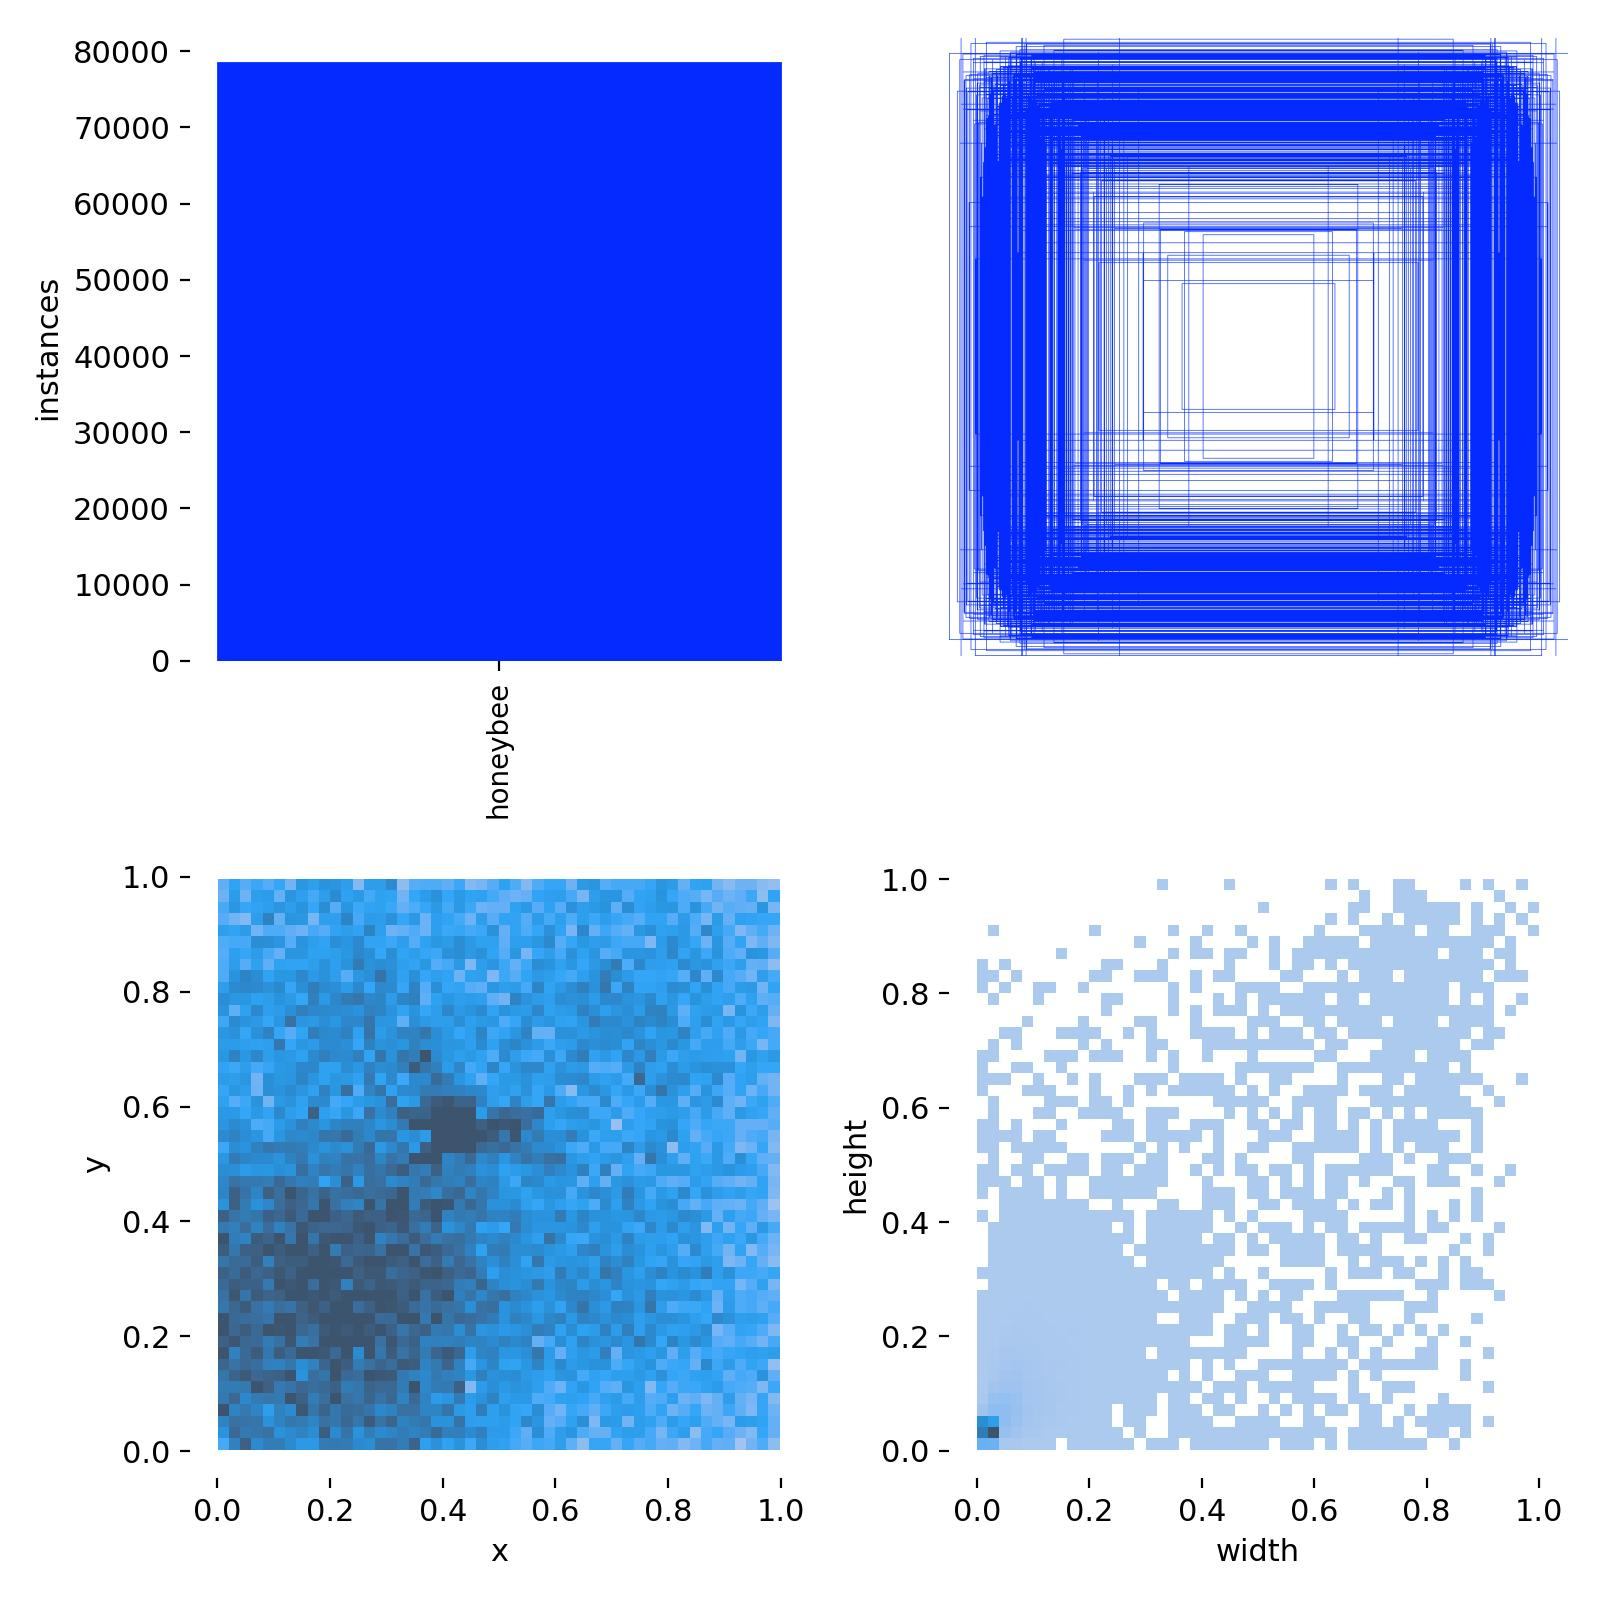

In [ ]:
Image("/content/runs/detect/train2/labels.jpg", width=600)

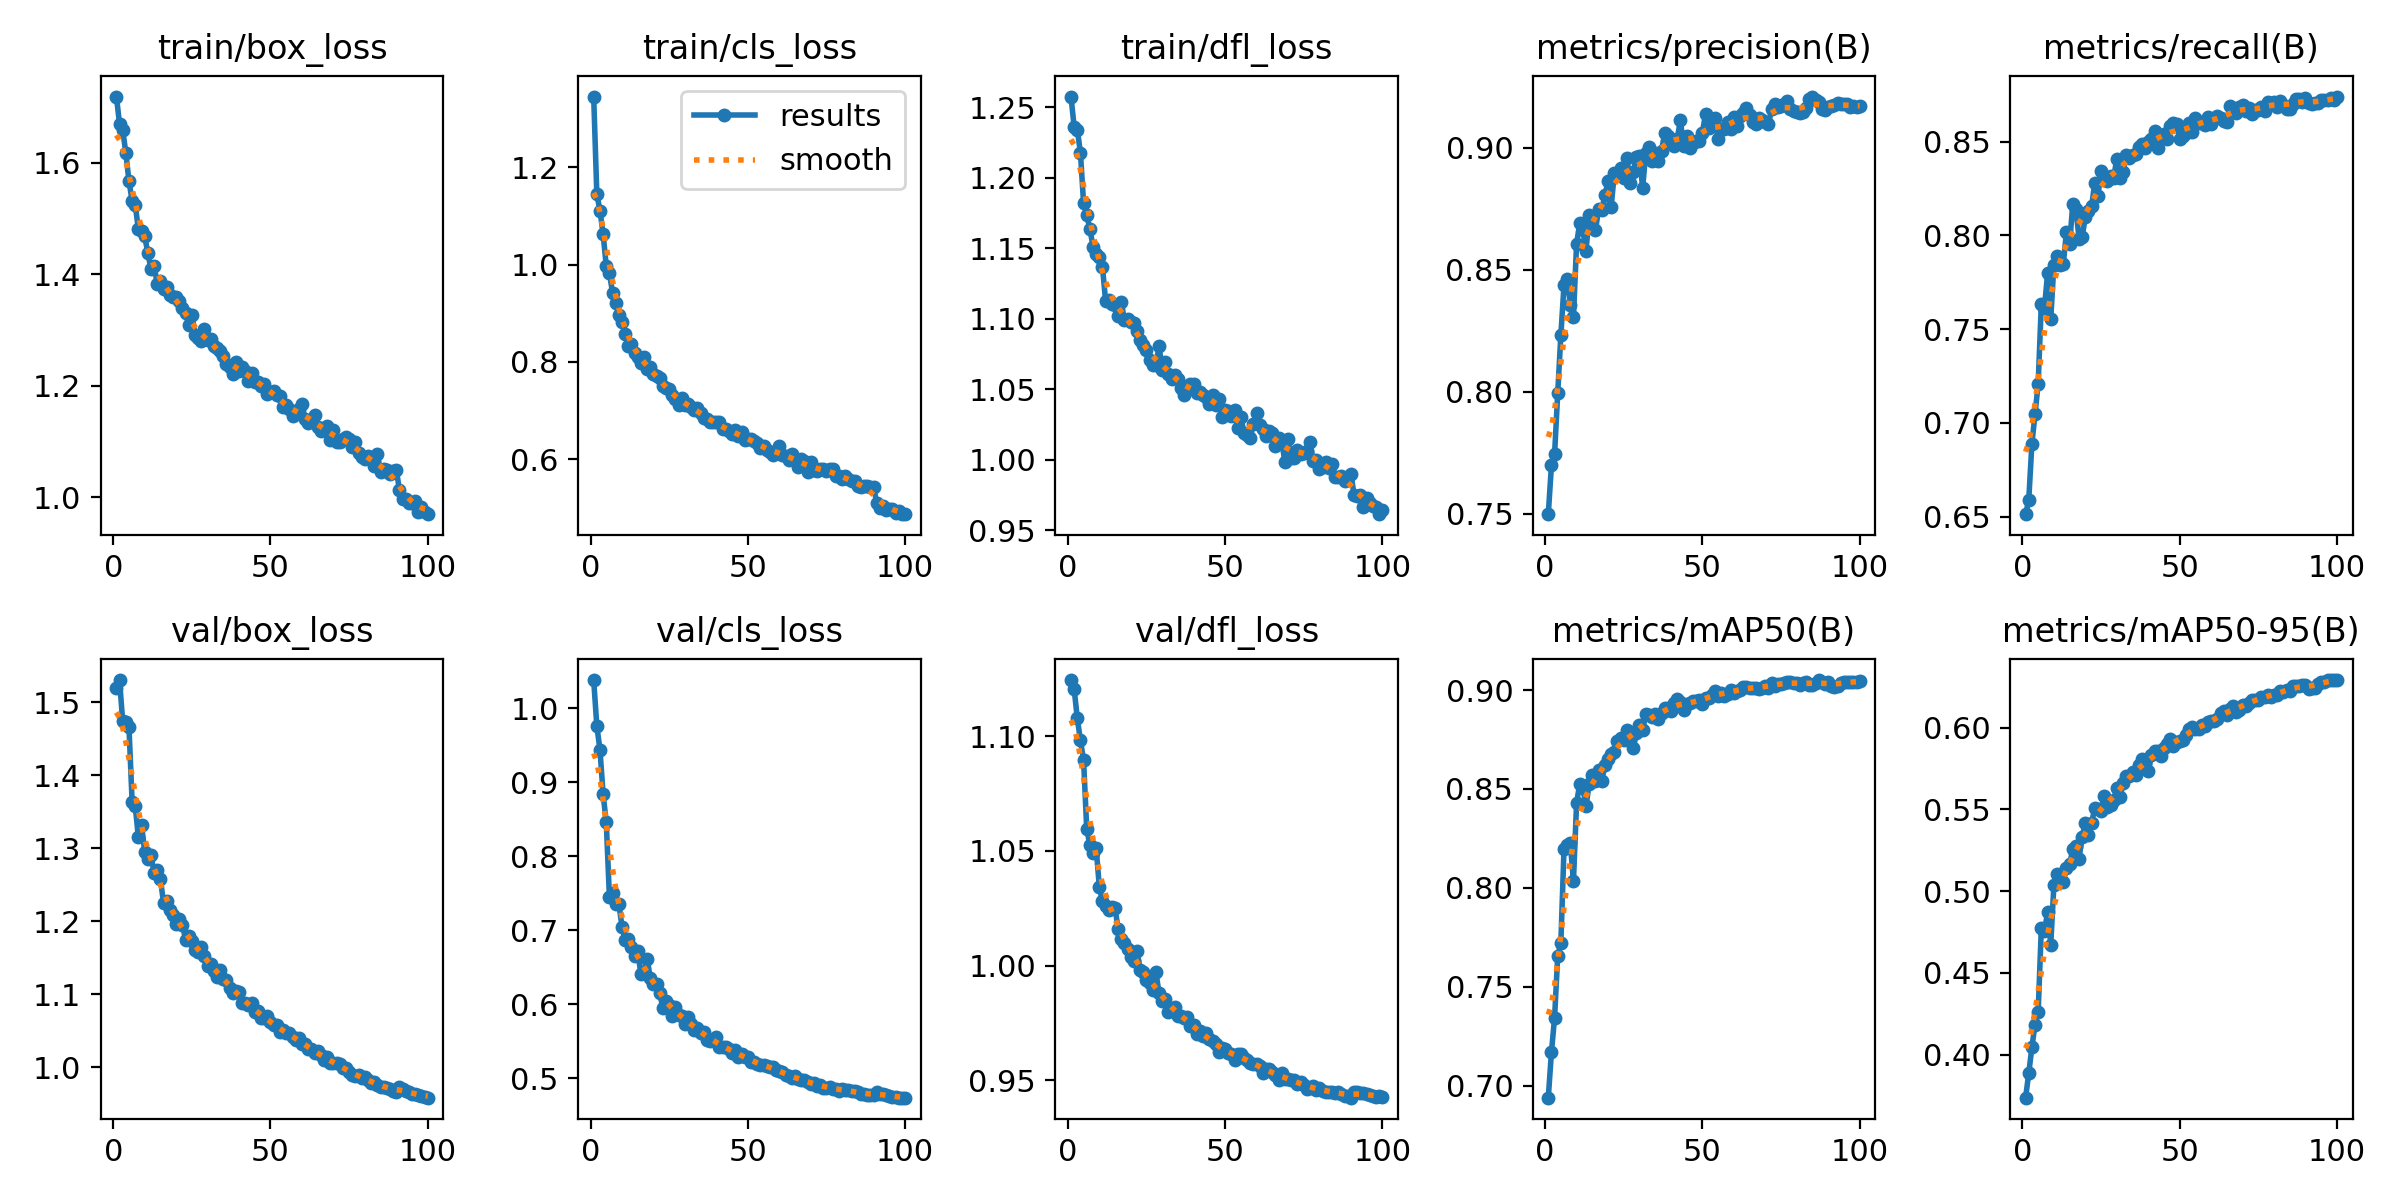

In [ ]:
Image("/content/runs/detect/train2/results.png", width=600)

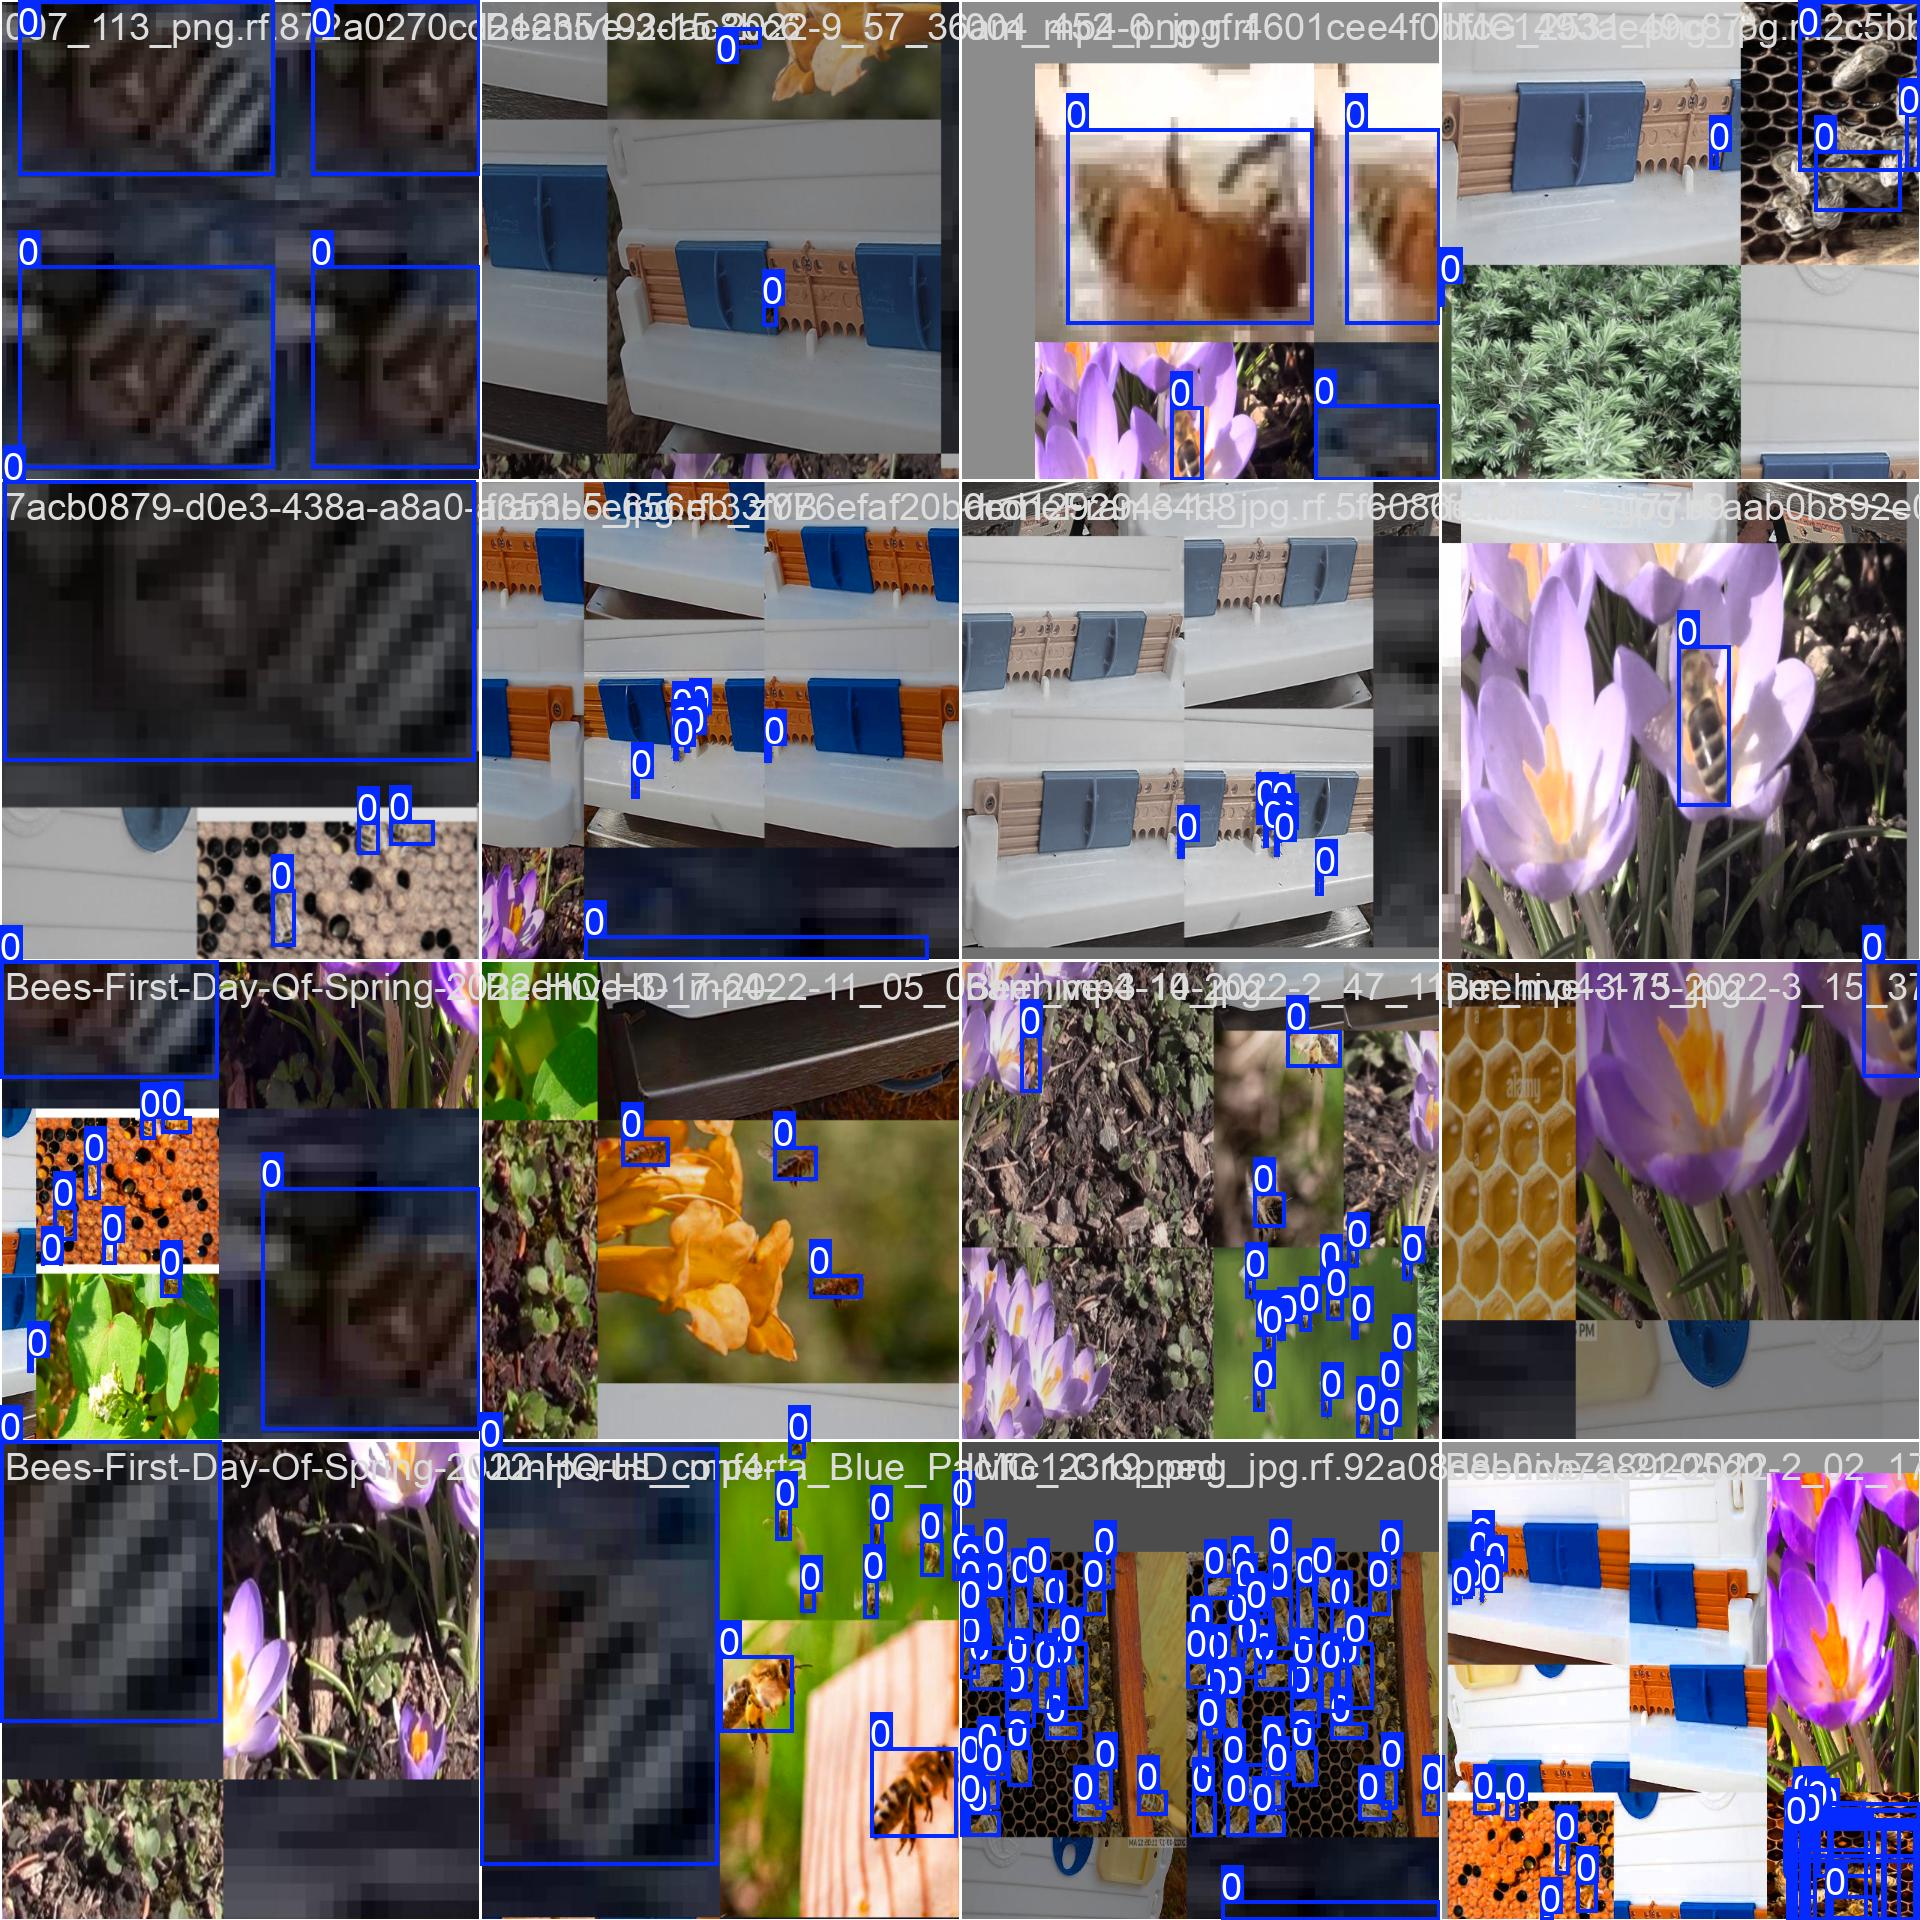

In [ ]:
Image("/content/runs/detect/train2/train_batch0.jpg", width=600)

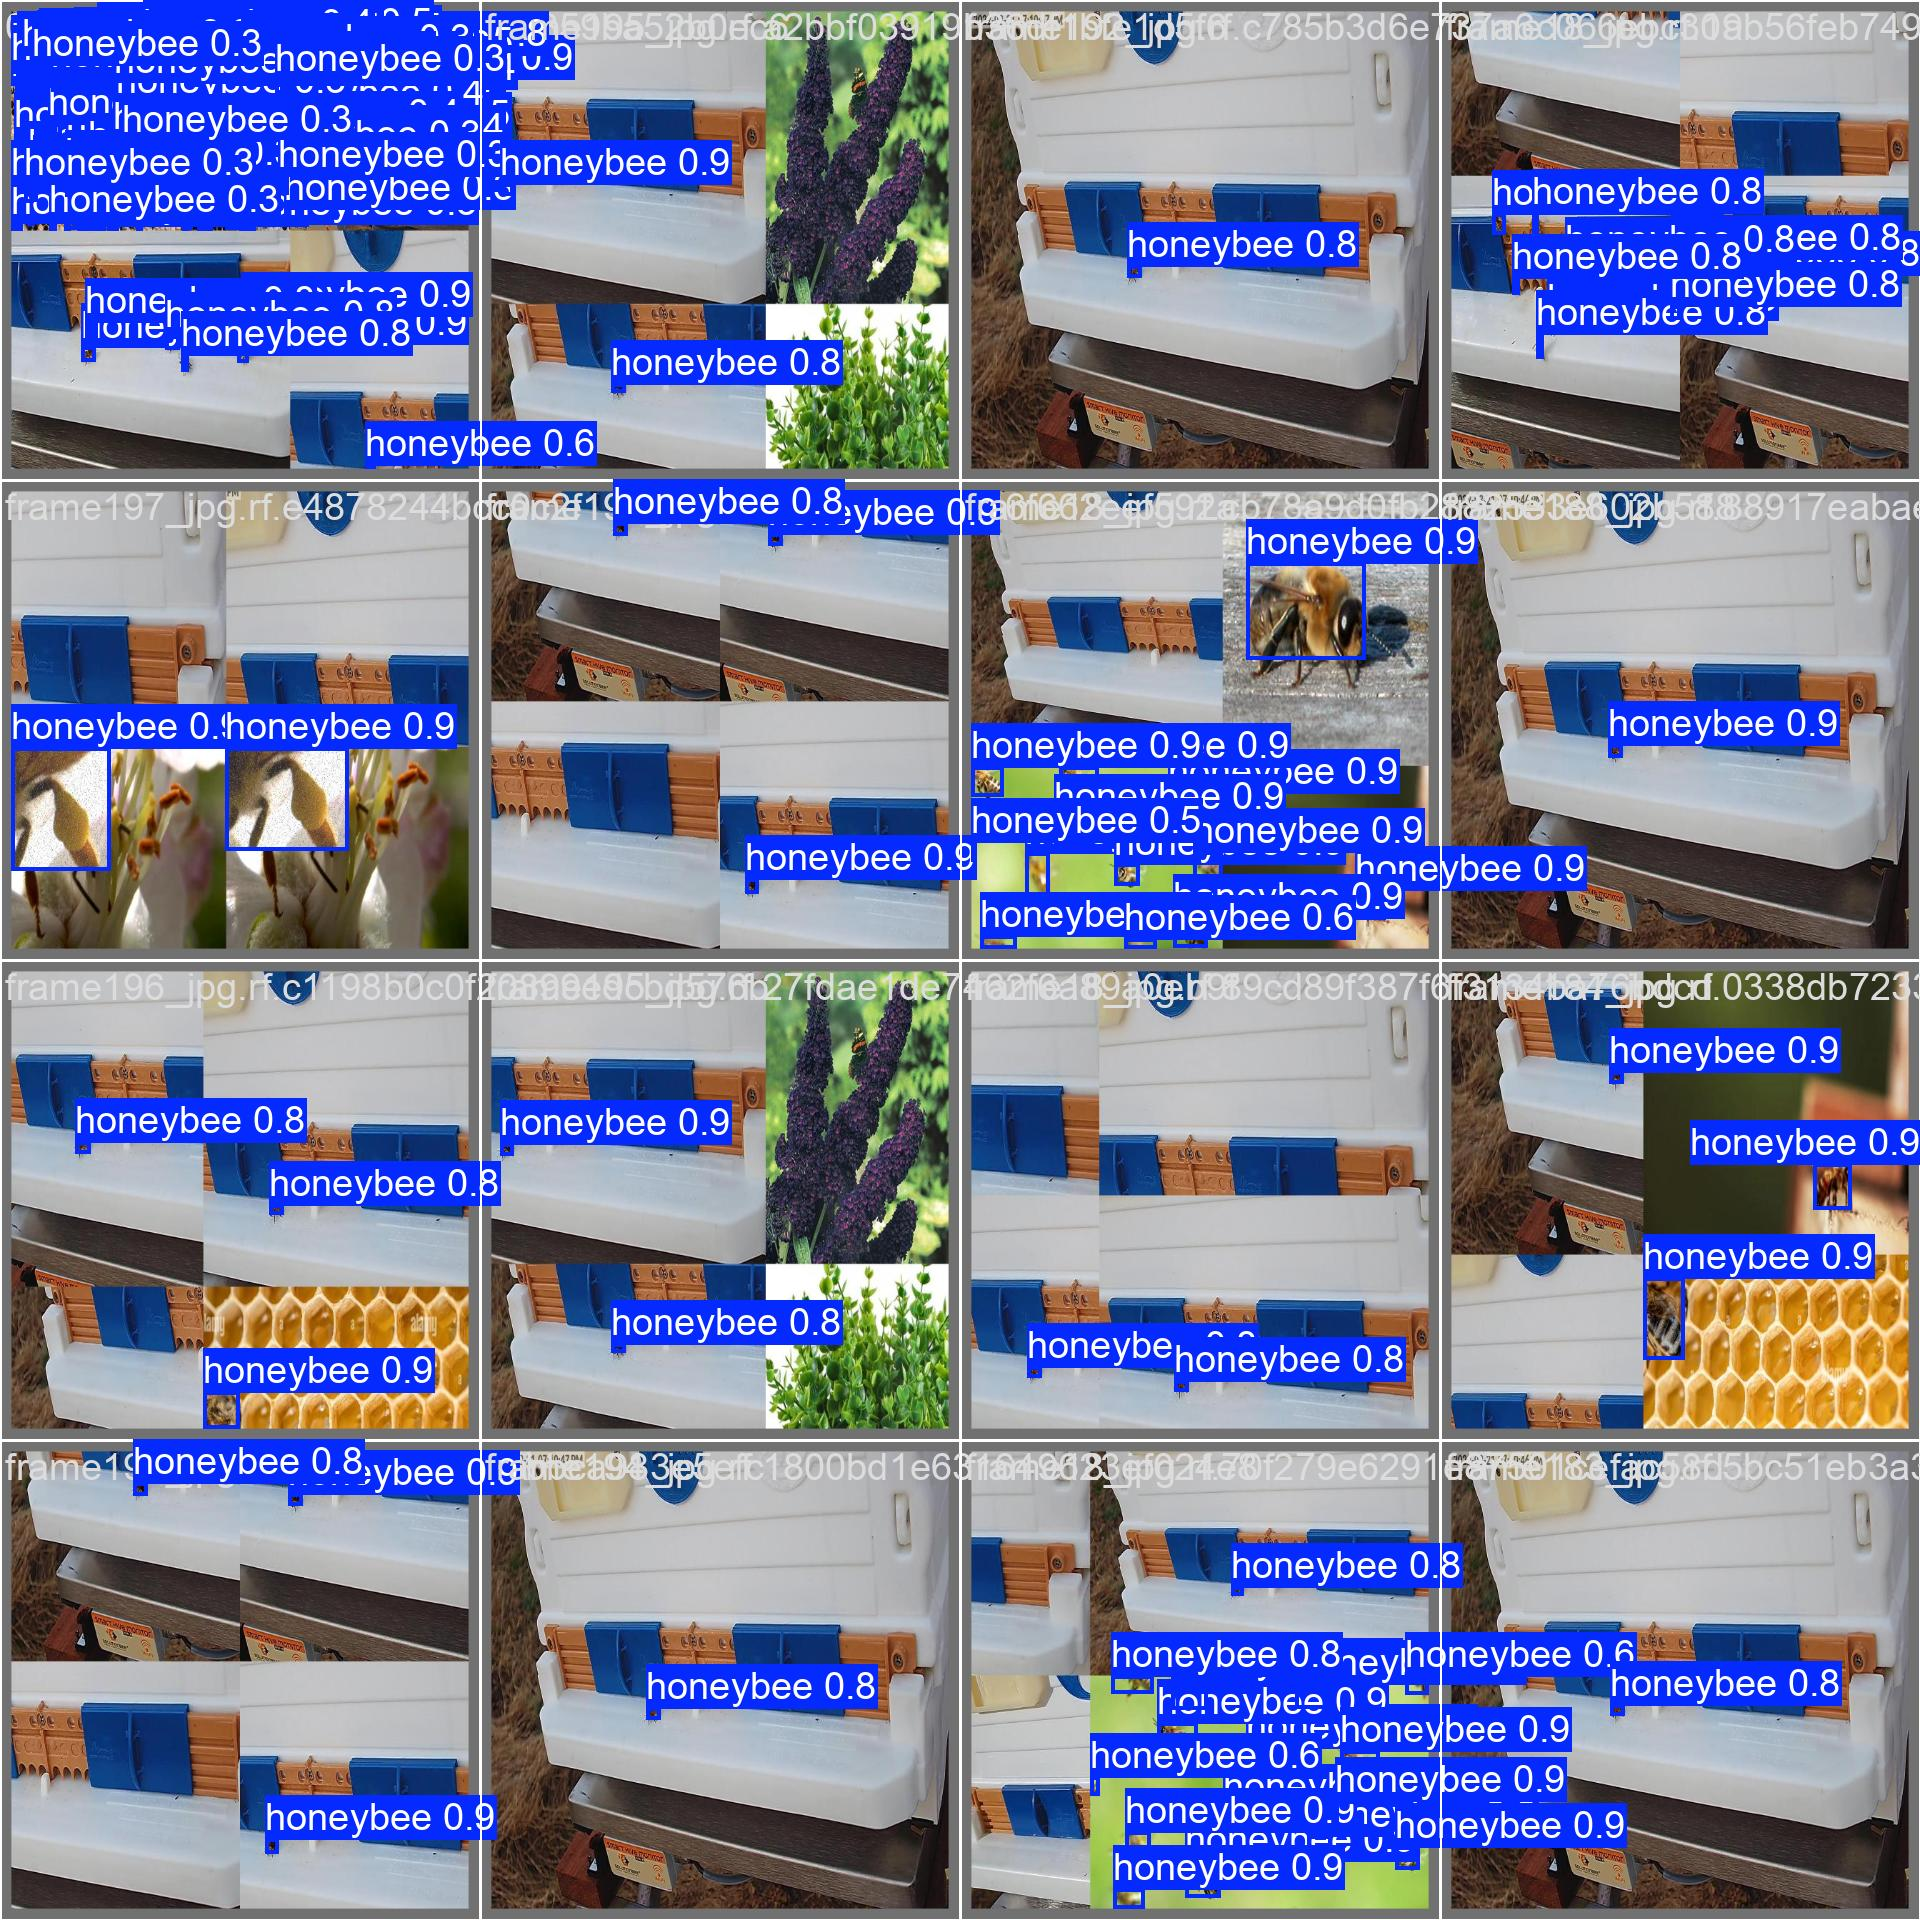

In [ ]:
Image("/content/runs/detect/train2/val_batch0_pred.jpg", width=600)

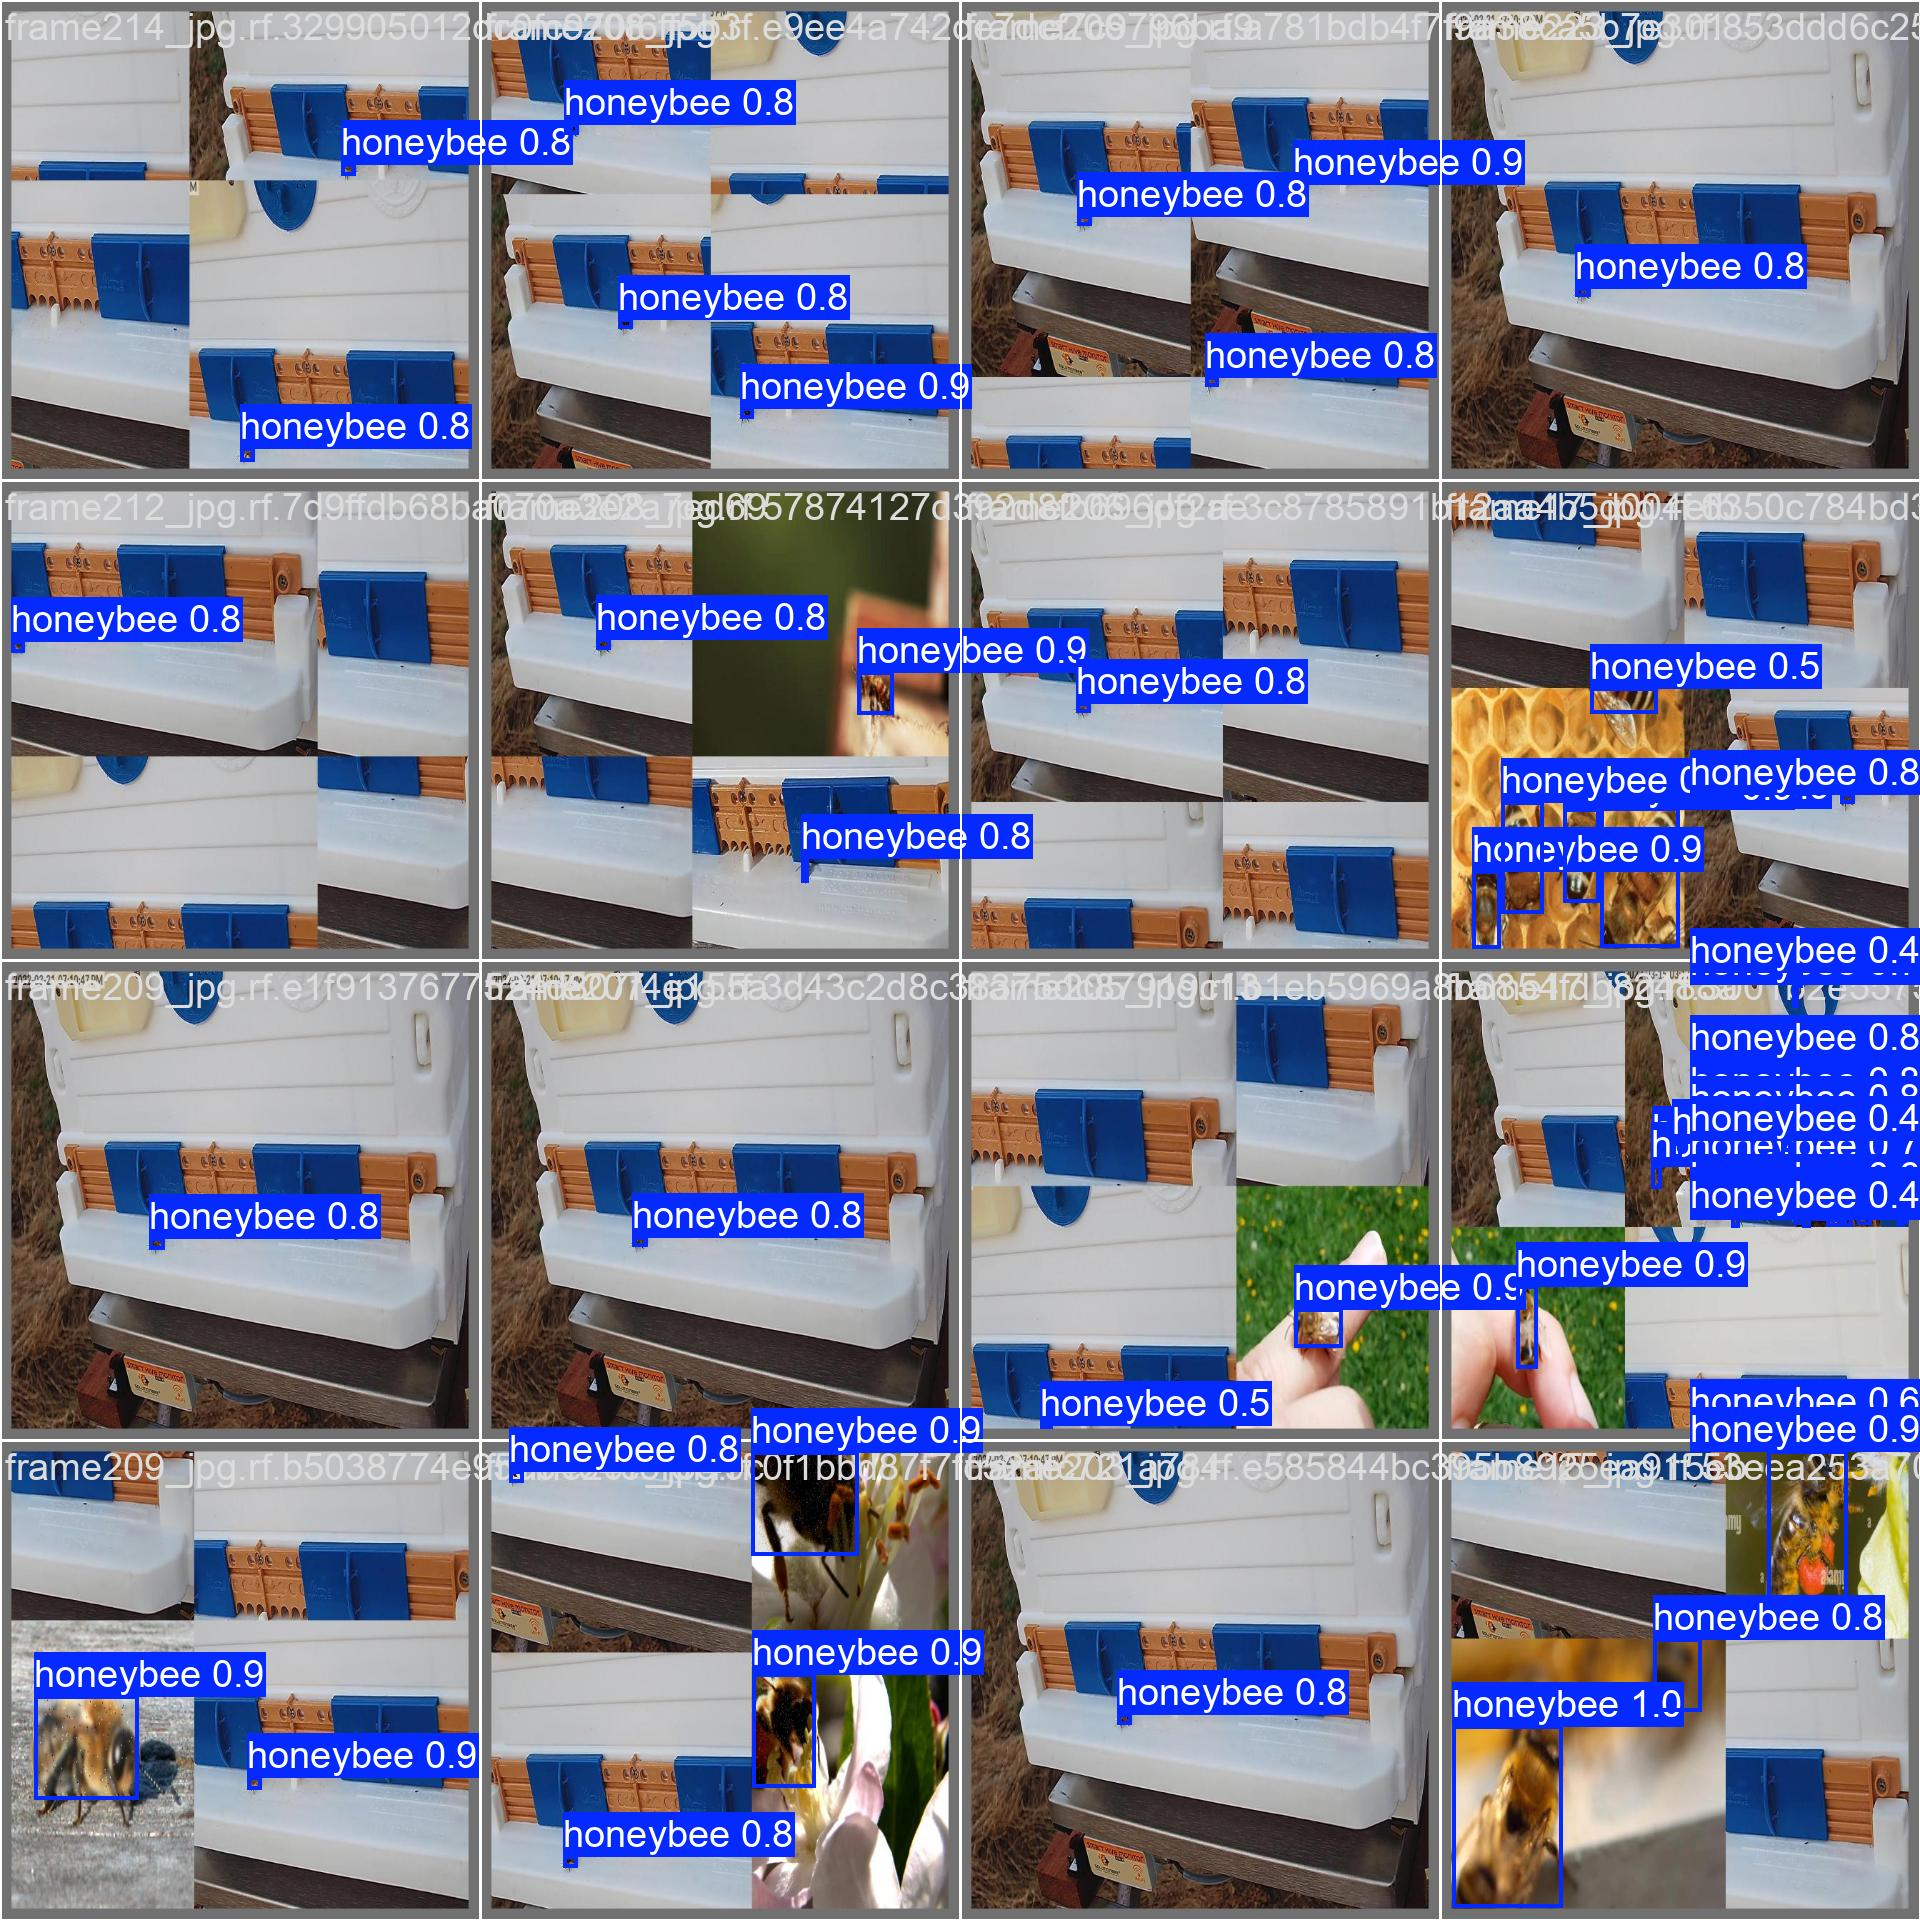

In [ ]:
Image("/content/runs/detect/train2/val_batch1_pred.jpg", width=600)

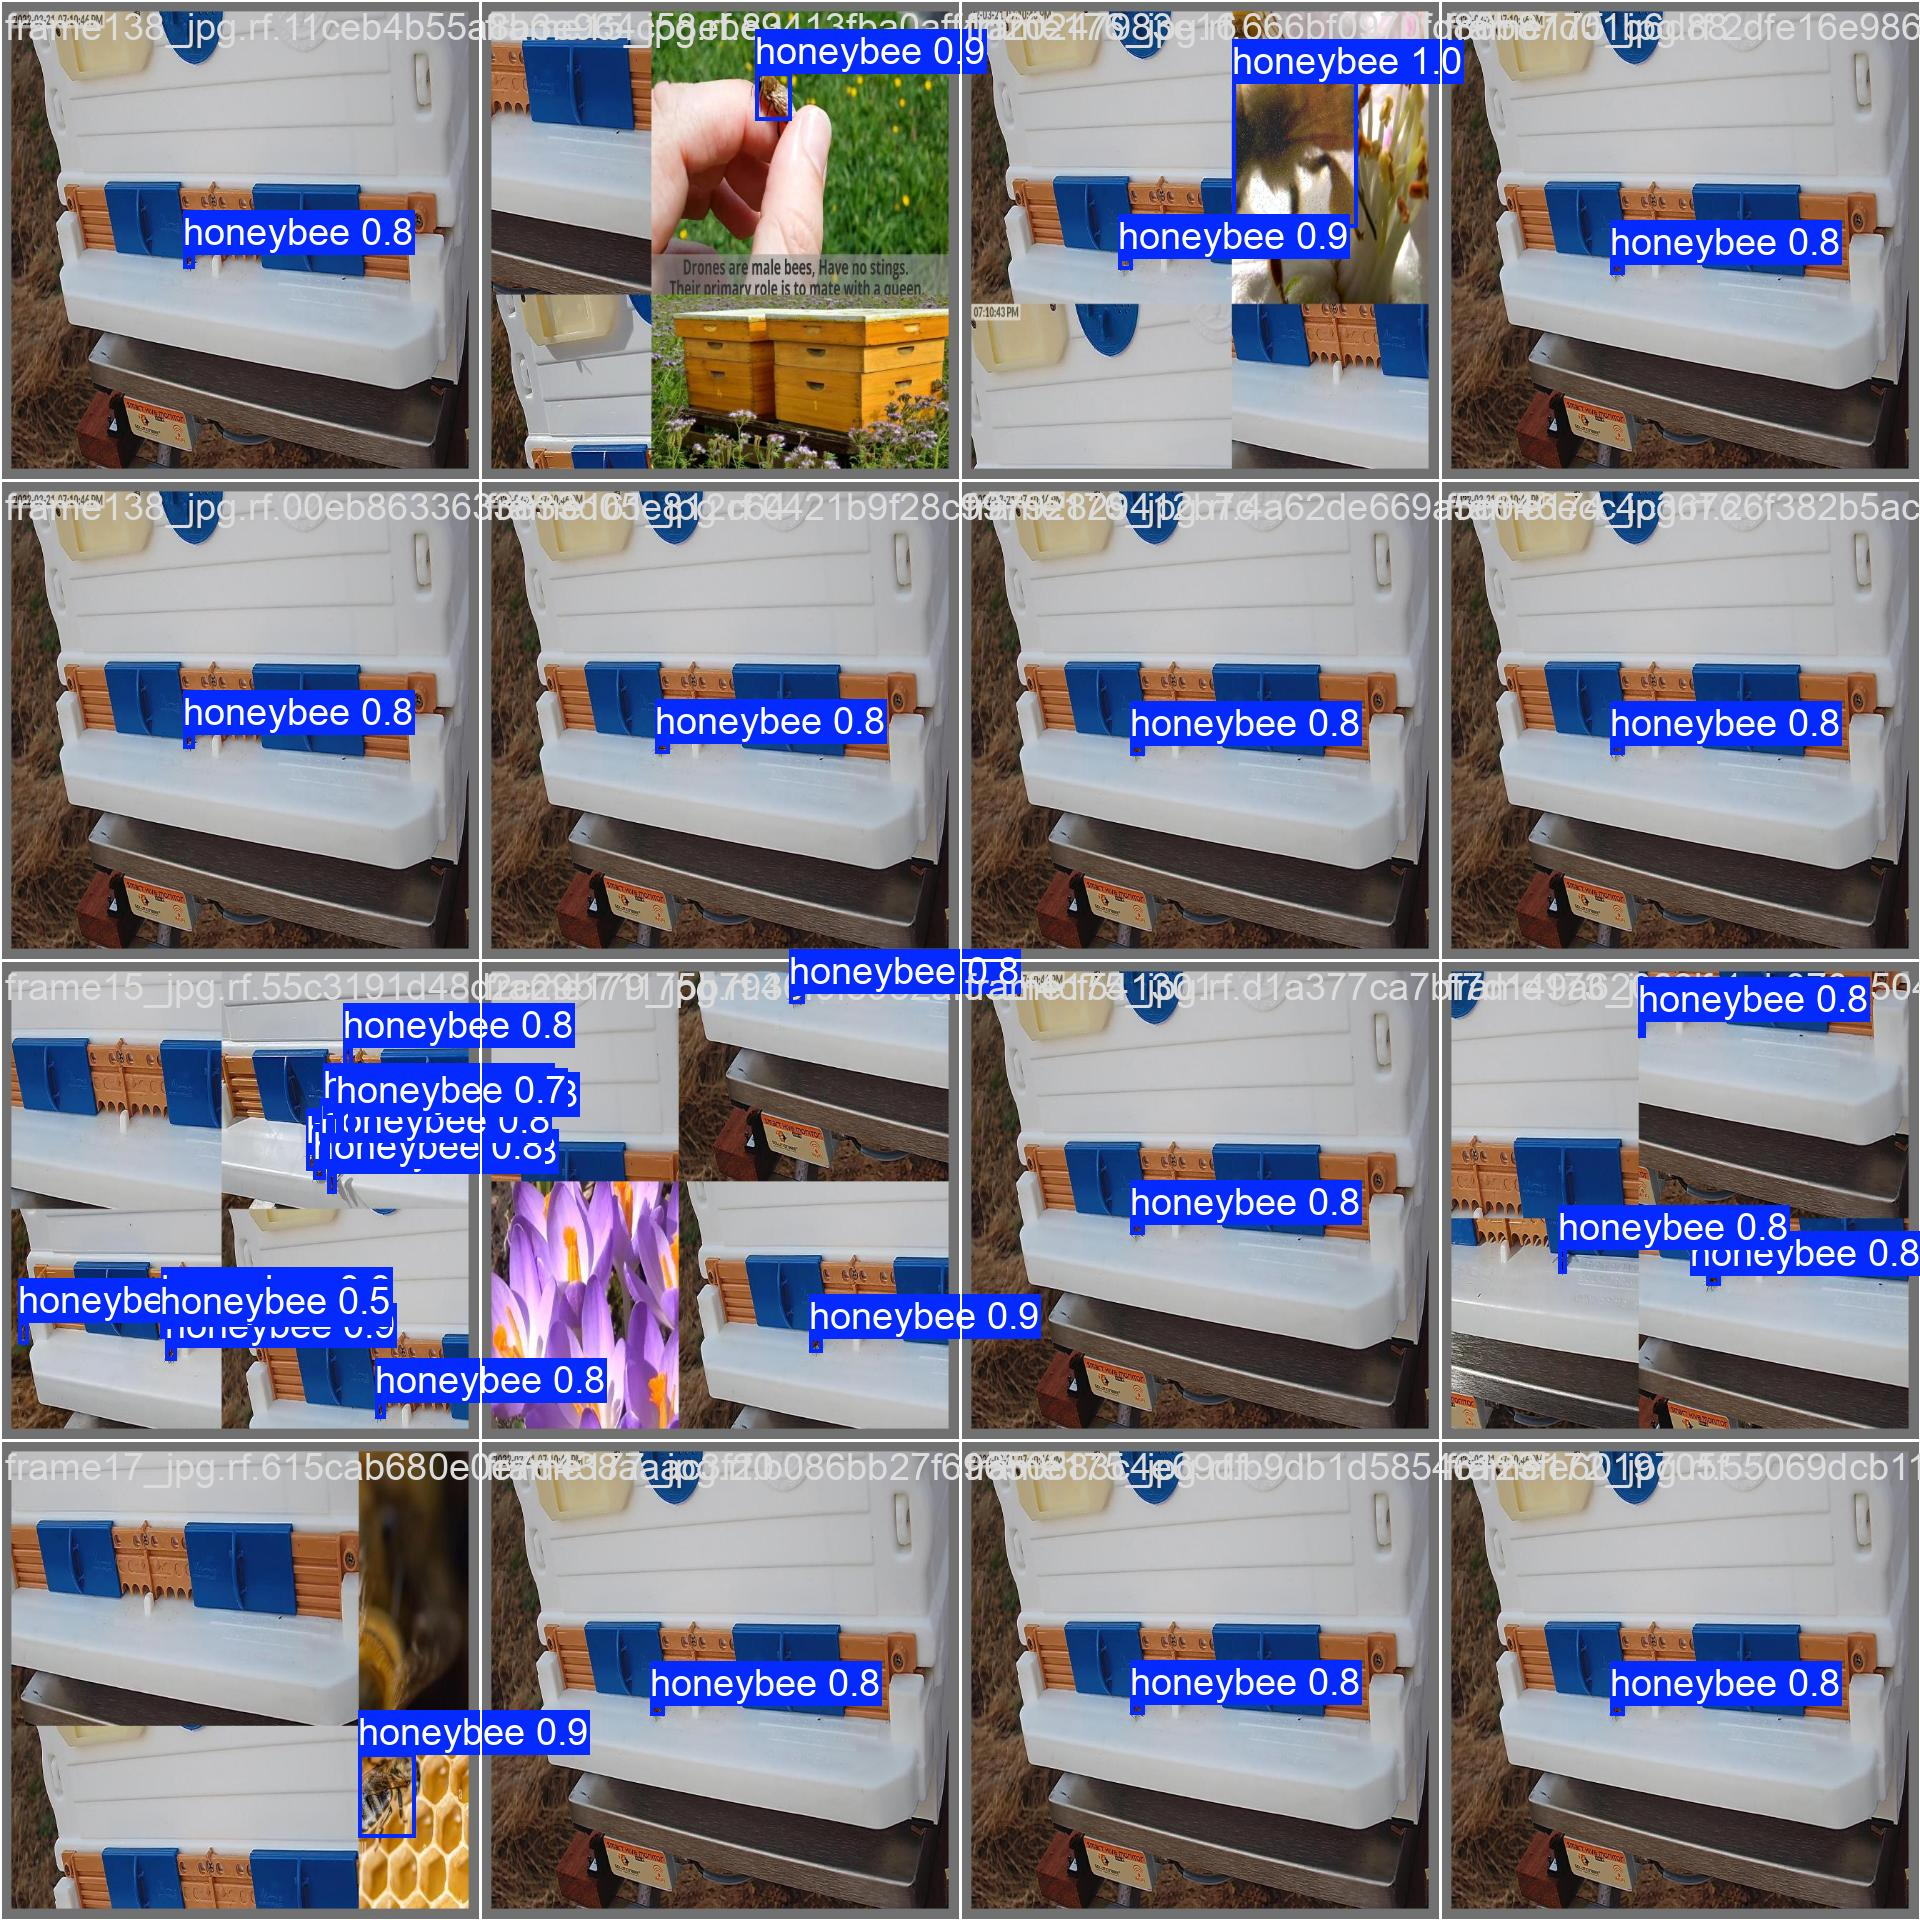

In [ ]:
Image("/content/runs/detect/train2/val_batch2_pred.jpg", width=600)

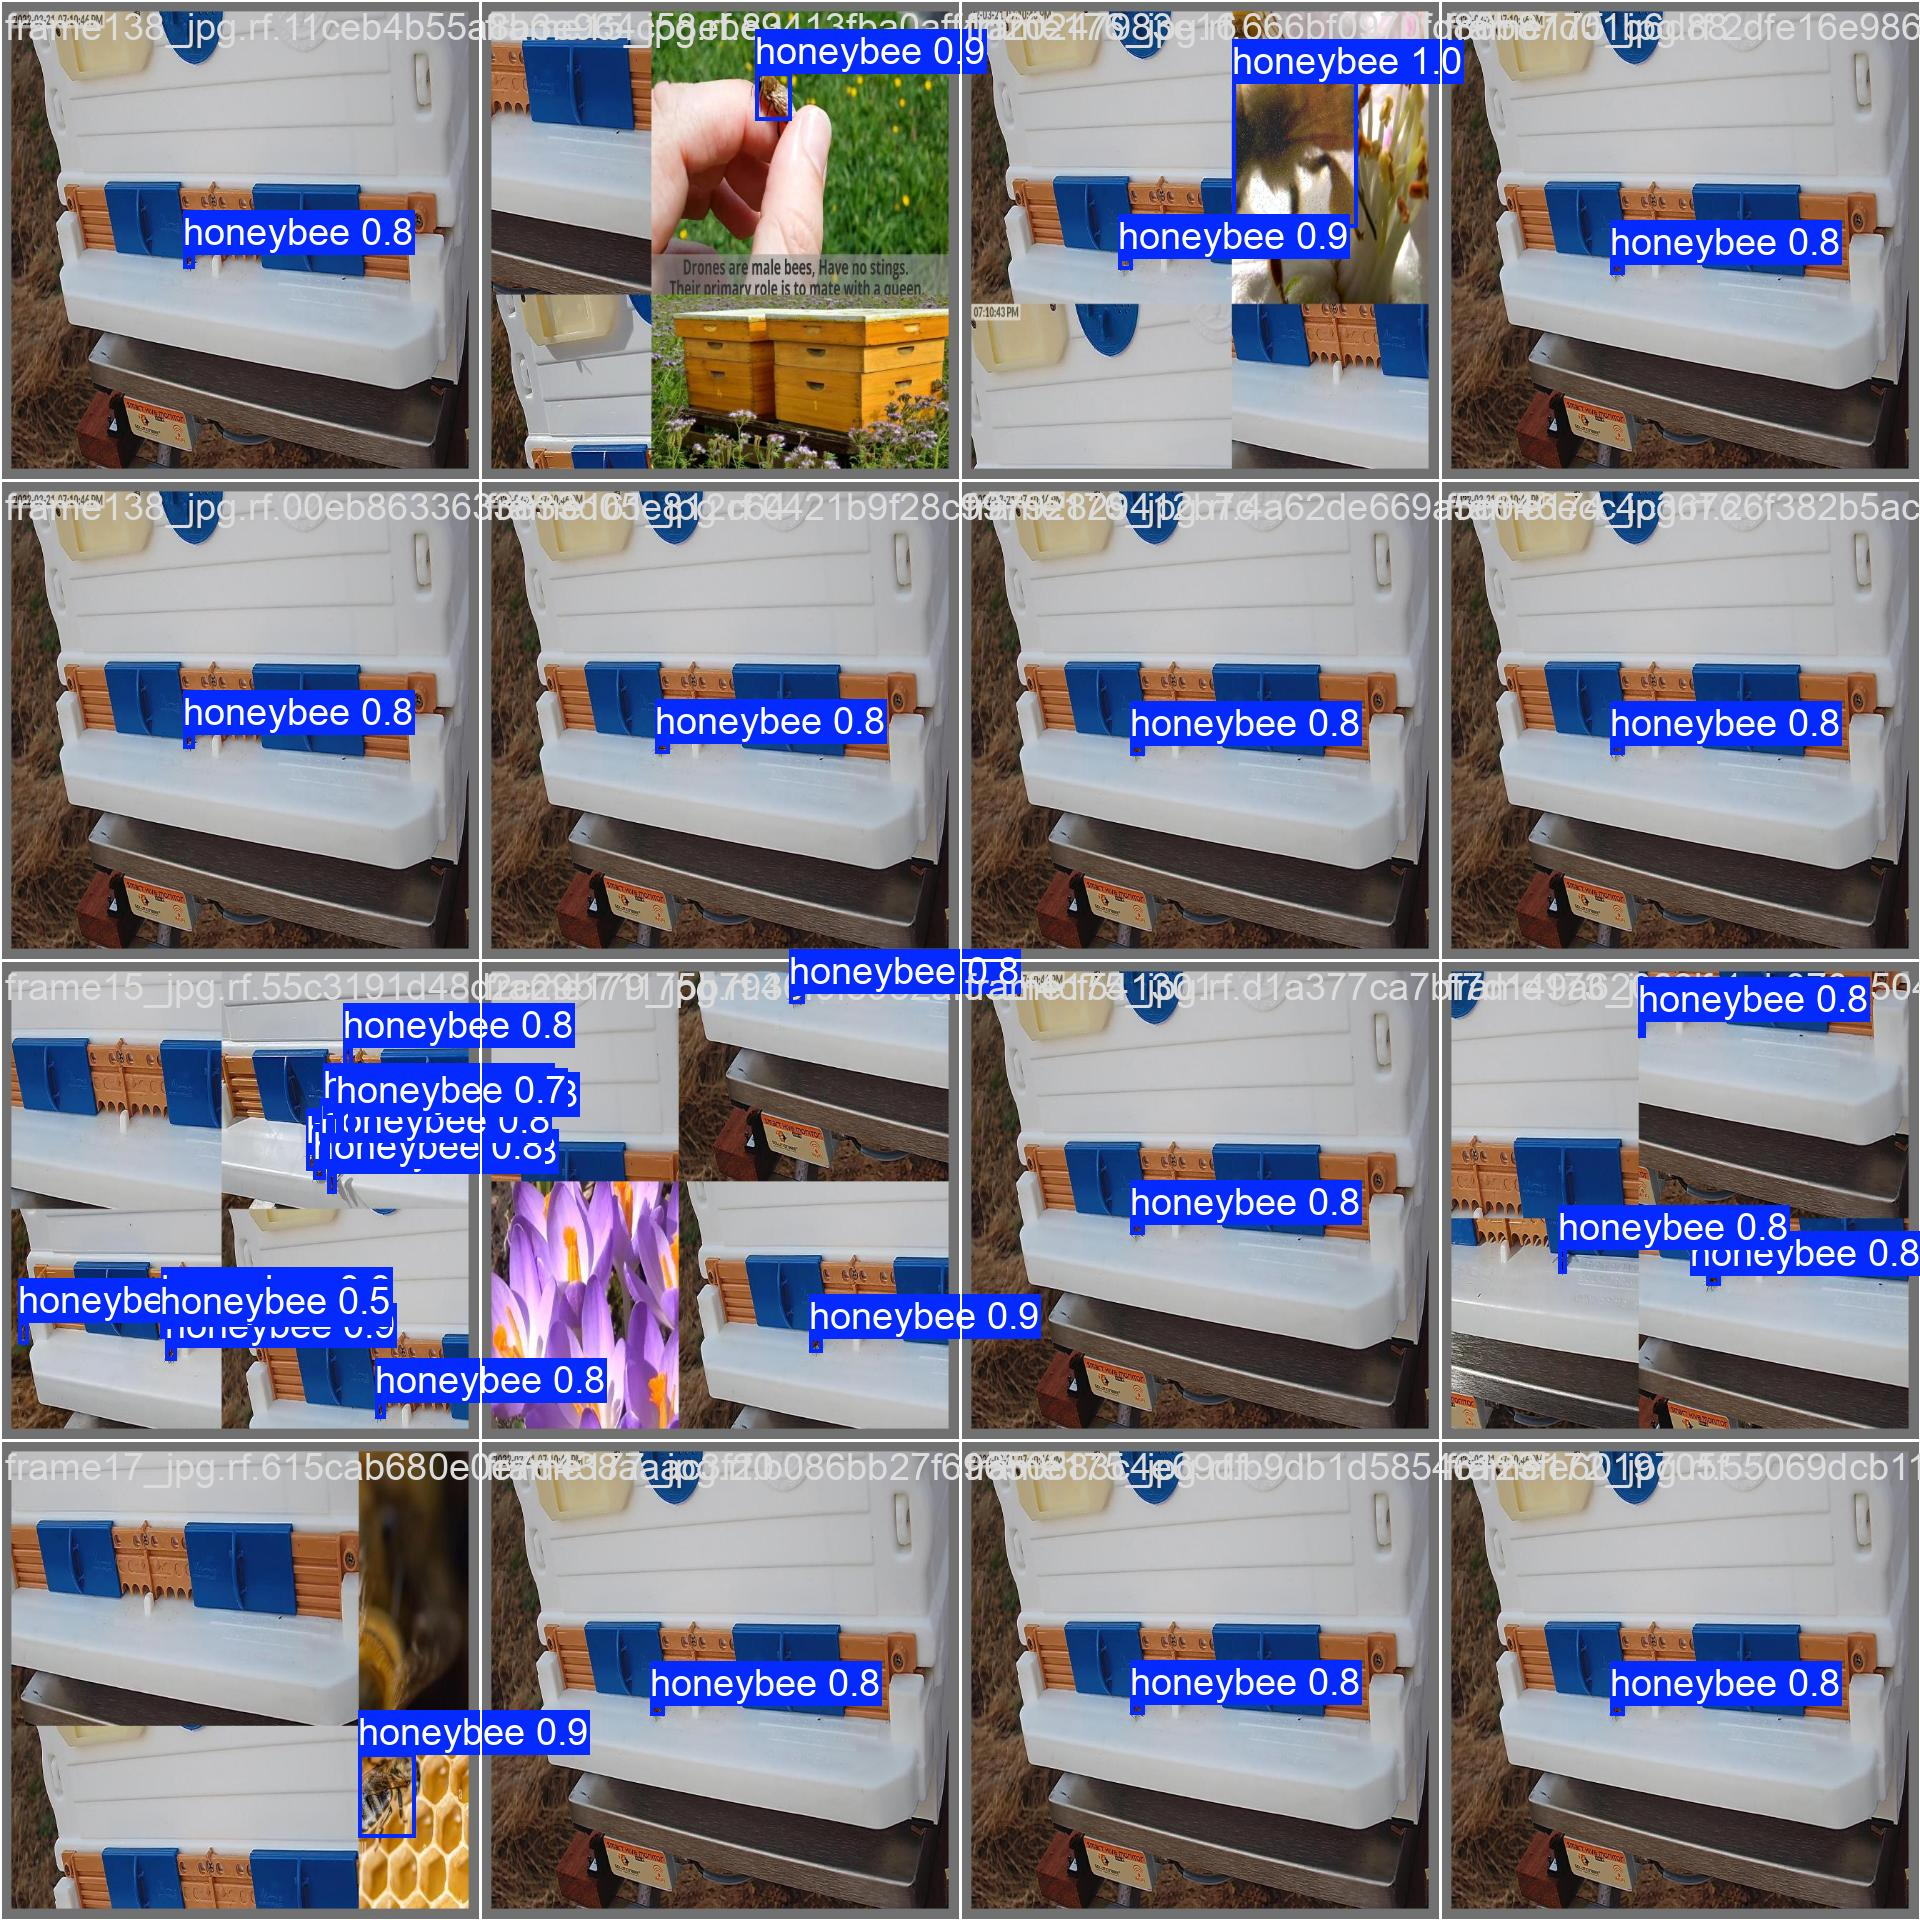

In [ ]:
Image("/content/runs/detect/train2/val_batch2_pred.jpg", width=1000)

Testing the model on a picture and displaying the results


image 1/1 /content/honeybee-test.jpeg: 448x640 17 honeybees, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Number of detected honeybees: 17


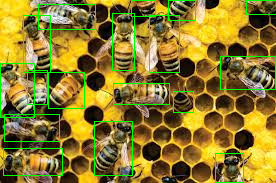

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Function to calculate IoU (Intersection over Union)
def calculate_iou(box1, box2):
    # Unpack box coordinates
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    # Calculate intersection
    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)

    if inter_x_max <= inter_x_min or inter_y_max <= inter_y_min:
        return 0.0  # No intersection

    inter_area = (inter_x_max - inter_x_min) * (inter_y_max - inter_y_min)

    # Calculate union
    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area  # IoU

# Load the model
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Run inference
image_path = "/content/honeybee-test.jpeg"  # Replace with your image path
results = model.predict(source=image_path, conf=0.25, show=False)

# Extract detections and map all classes to "honeybee"
bee_count = 0
detections = results[0]
unique_boxes = []  # To store non-overlapping boxes

annotated_image = cv2.imread(image_path)  # Load the original image for custom drawing

for box in detections.boxes:
    # Get box coordinates and class ID
    x1, y1, x2, y2 = box.xyxy[0]  # Bounding box coordinates
    class_id = int(box.cls[0])    # Get class ID

    # Check for overlaps (IoU) and count only unique detections
    is_unique = True
    for unique_box in unique_boxes:
        iou = calculate_iou((x1, y1, x2, y2), unique_box)
        if iou > 0.5:  # IoU threshold to consider overlapping boxes
            is_unique = False
            break

    if is_unique:
        unique_boxes.append((x1, y1, x2, y2))
        bee_count += 1
        # Draw bounding boxes only (no label)
        cv2.rectangle(annotated_image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 1)  # Green box

print(f"Number of detected honeybees: {bee_count}")

# Display the annotated image with only bounding boxes
cv2_imshow(annotated_image)  # Use cv2_imshow instead of cv2.imshow



image 1/1 /content/honeybee-test.jpeg: 448x640 17 honeybees, 14.5ms
Speed: 2.0ms preprocess, 14.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Number of detected honeybees: 17


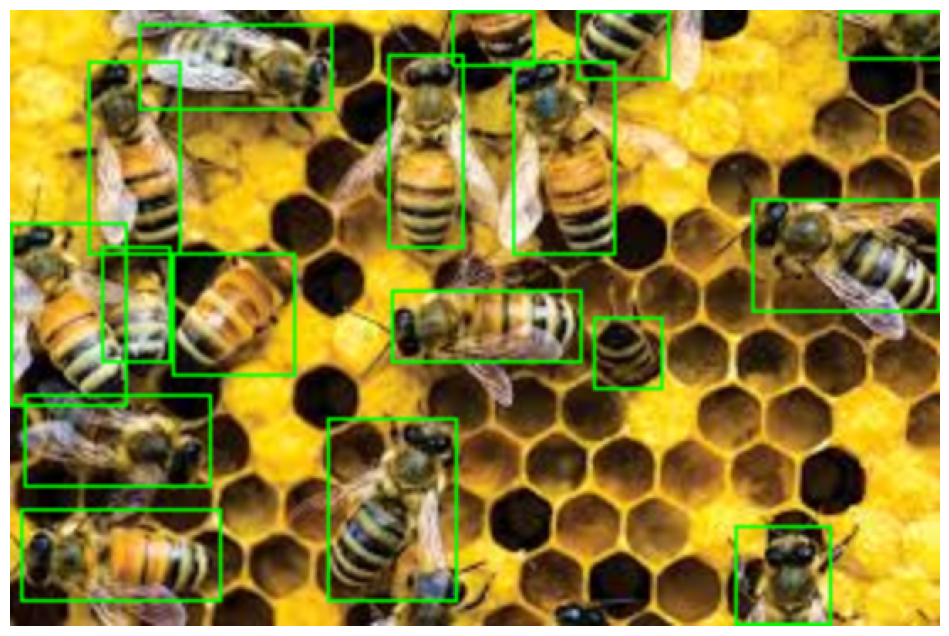

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow
import matplotlib.pyplot as plt  # Import matplotlib to control display size

# Function to calculate IoU (Intersection over Union)
def calculate_iou(box1, box2):
    # Unpack box coordinates
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    # Calculate intersection
    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)

    if inter_x_max <= inter_x_min or inter_y_max <= inter_y_min:
        return 0.0  # No intersection

    inter_area = (inter_x_max - inter_x_min) * (inter_y_max - inter_y_min)

    # Calculate union
    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area  # IoU

# Load the model
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Run inference
image_path = "/content/honeybee-test.jpeg"  # Replace with your image path
results = model.predict(source=image_path, conf=0.25, show=False)

# Extract detections and map all classes to "honeybee"
bee_count = 0
detections = results[0]
unique_boxes = []  # To store non-overlapping boxes

annotated_image = cv2.imread(image_path)  # Load the original image for custom drawing

for box in detections.boxes:
    # Get box coordinates and class ID
    x1, y1, x2, y2 = box.xyxy[0]  # Bounding box coordinates
    class_id = int(box.cls[0])    # Get class ID

    # Check for overlaps (IoU) and count only unique detections
    is_unique = True
    for unique_box in unique_boxes:
        iou = calculate_iou((x1, y1, x2, y2), unique_box)
        if iou > 0.5:  # IoU threshold to consider overlapping boxes
            is_unique = False
            break

    if is_unique:
        unique_boxes.append((x1, y1, x2, y2))
        bee_count += 1
        # Draw bounding boxes only (no label)
        cv2.rectangle(annotated_image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 1)  # Green box

print(f"Number of detected honeybees: {bee_count}")

# Resize the image before displaying (e.g., increasing the size by 2x)
height, width = annotated_image.shape[:2]
resized_image = cv2.resize(annotated_image, (width * 2, height * 2))  # Double the size

# Display the resized annotated image with matplotlib
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')  # Turn off axes
plt.show()



image 1/1 /content/honeybee-test.jpeg: 448x640 17 honeybees, 14.1ms
Speed: 2.6ms preprocess, 14.1ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Number of detected honeybees: 17


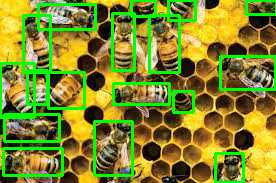

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Function to calculate IoU (Intersection over Union)
def calculate_iou(box1, box2):
    # Unpack box coordinates
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    # Calculate intersection
    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)

    if inter_x_max <= inter_x_min or inter_y_max <= inter_y_min:
        return 0.0  # No intersection

    inter_area = (inter_x_max - inter_x_min) * (inter_y_max - inter_y_min)

    # Calculate union
    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area  # IoU

# Load the model
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Run inference
image_path = "/content/honeybee-test.jpeg"  # Replace with your image path
results = model.predict(source=image_path, conf=0.25, show=False)

# Extract detections and map all classes to "honeybee"
bee_count = 0
detections = results[0]
unique_boxes = []  # To store non-overlapping boxes

annotated_image = cv2.imread(image_path)  # Load the original image for custom drawing

for box in detections.boxes:
    # Get box coordinates and class ID
    x1, y1, x2, y2 = box.xyxy[0]  # Bounding box coordinates
    class_id = int(box.cls[0])    # Get class ID

    # Check for overlaps (IoU) and count only unique detections
    is_unique = True
    for unique_box in unique_boxes:
        iou = calculate_iou((x1, y1, x2, y2), unique_box)
        if iou > 0.5:  # IoU threshold to consider overlapping boxes
            is_unique = False
            break

    if is_unique:
        unique_boxes.append((x1, y1, x2, y2))
        bee_count += 1
        # Draw bounding boxes and label as "honeybee"
        cv2.rectangle(annotated_image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # Green box
        # cv2.putText(
        #     annotated_image,
        #     "honeybee",
        #     (int(x1), int(y1) - 10),
        #     cv2.FONT_HERSHEY_SIMPLEX,
        #     0.5,
        #     (0, 255, 0),
        #     2
        # )

print(f"Number of detected honeybees: {bee_count}")

# Add overall count to the image
# cv2.putText(
#     annotated_image,
#     f"Bee Count: {bee_count}",
#     (10, 50),
#     cv2.FONT_HERSHEY_SIMPLEX,
#     1,
#     (0, 255, 0),
#     2
# )

# Display the annotated image
cv2_imshow(annotated_image)  # Use cv2_imshow instead of cv2.imshow
